In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/final_fashion_dataset (2).csv")
df.head()

user_id     id  gender masterCategory subCategory articleType baseColour  \
0    93810   8493   Women        Apparel  Bottomwear      Skirts      Black   
1    24592  30757     Men        Apparel     Topwear      Kurtas       Grey   
2    13278  14881   Women    Accessories        Bags    Handbags      Black   
3    46048  48449     Men        Apparel     Topwear     Tshirts       Blue   
4    42098   4697  Unisex    Accessories     Watches     Watches      Black   

   season    year   usage                                 productDisplayName  \
0    Fall  2011.0  Casual                     Forever New Women Black Skirts   
1  Summer  2012.0  Ethnic                 Fabindia Men Grey Mangalgiri Kurta   
2  Summer  2011.0  Casual  United Colors of Benetton Women Solid Black Ha...   
3  Summer  2012.0  Casual                 French Connection Men Blue T-shirt   
4  Winter  2016.0  Sports           ADIDAS Unisex Digital Duramo Black Watch   

    filename                                               link  ratings  \
0   8493.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
1  30757.jpg  http://assets.myntassets.com/v1/images/style/p...        4   
2  14881.jpg  http://assets.myntassets.com/v1/images/style/p...        3   
3  48449.jpg  http://assets.myntassets.com/v1/images/style/p...        5   
4   4697.jpg  http://assets.myntassets.com/v1/images/style/p...        4   

                                              review      Month  Price (USD)  
0  Amazing quality! Definitely recommend. Would r...   November           46  
1              Perfect for any occasion, great buy..  September           29  
2                       It's okay, nothing special.!    October           39  
3  Comfortable and stylish, worth the price. and ...     August           39  
4              Perfect for any occasion, great buy.!      March           33

In [ ]:
df.shape

(36484, 17)

<h3>handling missing values</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [ ]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [ ]:
df.usage.value_counts()

usage
Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

user_id            id          year       ratings   Price (USD)
count  36484.000000  36484.000000  36484.000000  36484.000000  36484.000000
mean   55673.109336  27860.189124   2012.461737      3.600839     33.828610
std    25987.221109  16562.799723      1.860980      1.279767     11.320579
min    10022.000000   1163.000000   2007.000000      1.000000     10.000000
25%    32865.000000  13247.000000   2011.000000      3.000000     25.000000
50%    55706.000000  26471.500000   2012.000000      4.000000     34.000000
75%    78386.000000  41718.250000   2012.000000      5.000000     42.000000
max    99995.000000  60000.000000   2018.000000      5.000000     66.000000

In [ ]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [ ]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [ ]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [ ]:
df_unique = pd.DataFrame(dict_unique)
df_unique

numerical_columns  unique_values
0                id          36484
1              year             12
2           ratings              5
3       Price (USD)             57

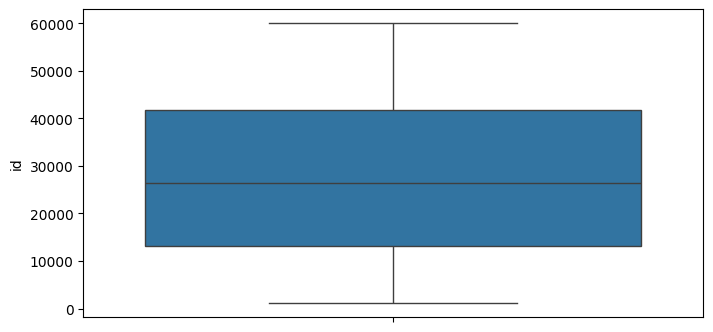

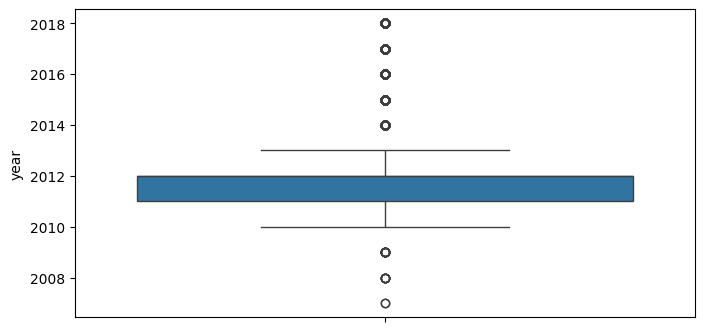

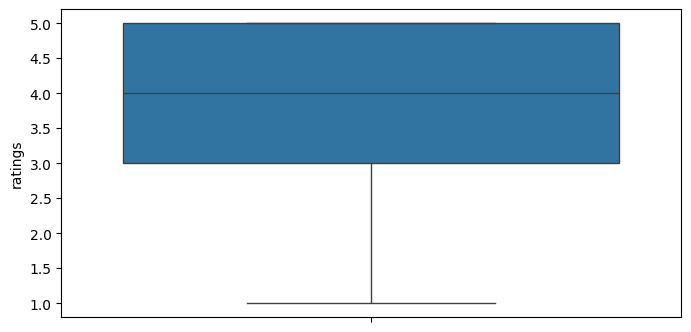

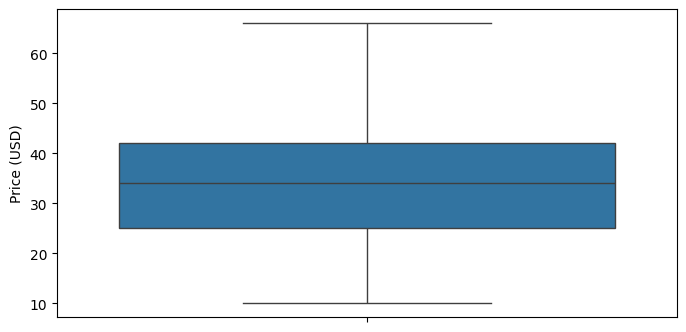

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

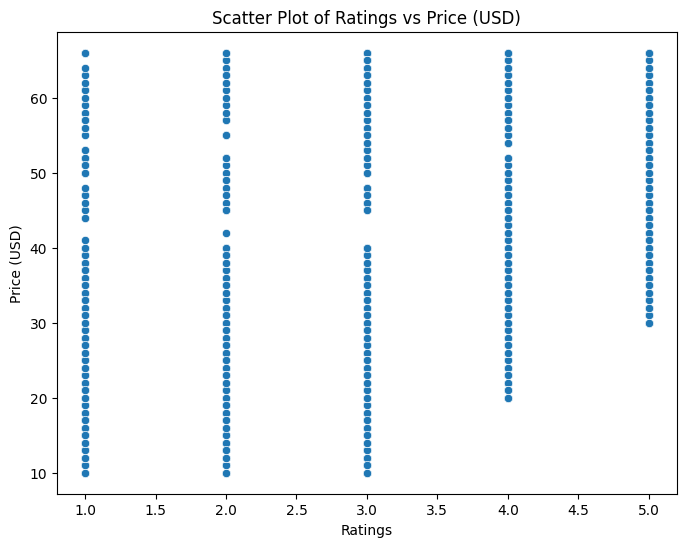

In [ ]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [ ]:
q25,q75 = np.percentile(df["year"],[25,75])

In [ ]:
iqr = q75 - q25
iqr

1.0

In [ ]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(2009.5, 2013.4)

In [ ]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [ ]:

df

user_id     id  gender masterCategory subCategory   articleType  \
0        93810   8493   Women        Apparel  Bottomwear        Skirts   
1        24592  30757     Men        Apparel     Topwear        Kurtas   
2        13278  14881   Women    Accessories        Bags      Handbags   
3        46048  48449     Men        Apparel     Topwear       Tshirts   
6        28289  12868     Men       Footwear       Shoes  Formal Shoes   
...        ...    ...     ...            ...         ...           ...   
36475    73318  54078     Men       Footwear       Shoes  Sports Shoes   
36476    18851  13183     Men       Footwear       Shoes  Sports Shoes   
36477    55457  10264     Men       Footwear       Shoes  Formal Shoes   
36479    40311  45378   Women       Footwear       Shoes         Flats   
36483    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
0          Black    Fall  2011.0  Casual   
1           Grey  Summer  2012.0  Ethnic   
2          Black  Summer  2011.0  Casual   
3           Blue  Summer  2012.0  Casual   
6          Black  Spring  2012.0  Formal   
...          ...     ...     ...     ...   
36475     Orange  Summer  2012.0  Sports   
36476      White    Fall  2011.0  Sports   
36477      Black  Summer  2013.0  Formal   
36479      Black  Summer  2012.0  Casual   
36483  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
0                         Forever New Women Black Skirts   8493.jpg   
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
6                      Lee Cooper Men Formal Black Shoes  12868.jpg   
...                                                  ...        ...   
36475    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
36476                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
36477    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
36479                          Rocia Women Black Sandals  45378.jpg   
36483  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
6      http://assets.myntassets.com/v1/images/style/p...        3   
...                                                  ...      ...   
36475  http://assets.myntassets.com/v1/images/style/p...        5   
36476  http://assets.myntassets.com/v1/images/style/p...        5   
36477  http://assets.myntassets.com/v1/images/style/p...        5   
36479  http://assets.myntassets.com/v1/images/style/p...        5   
36483  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
0      Amazing quality! Definitely recommend. Would r...   November   
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
6      Satisfactory for the price. for special occasi...     August   
...                                                  ...        ...   
36475  Exceeded expectations, love the fit! but could...  September   
36476  Perfect for any occasion, great buy. and I'm v...    January   
36477              Exceeded expectations, love the fit!.   November   
36479  High quality fabric, very satisfied. and I'm v...   November   
36483            Not as described, low-quality product.!   February   

       Price (USD)  
0               46  
1           

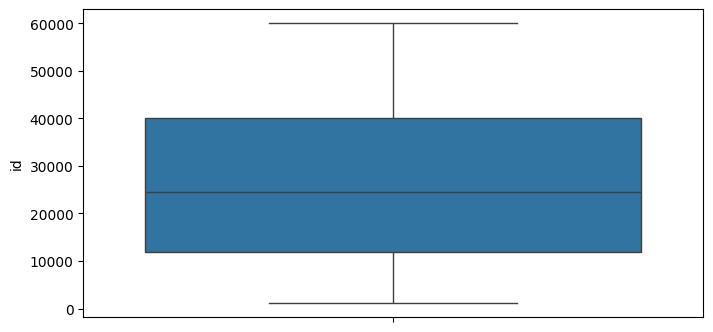

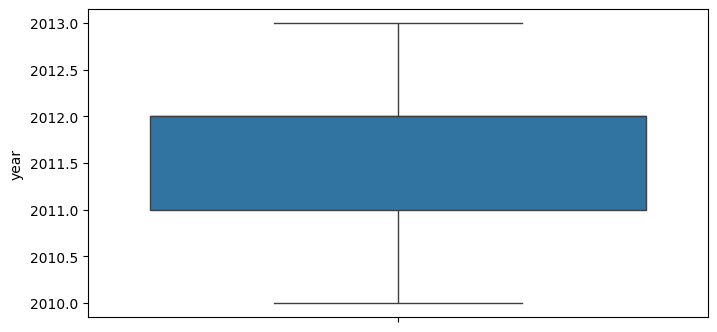

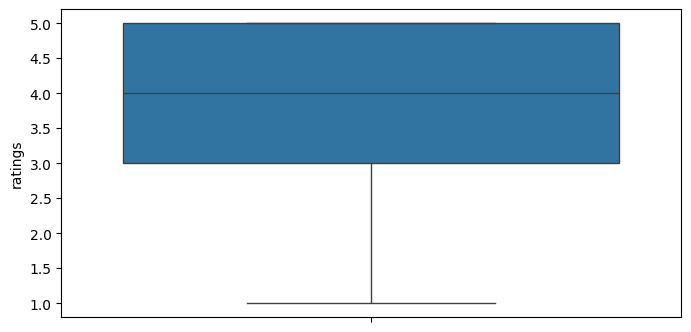

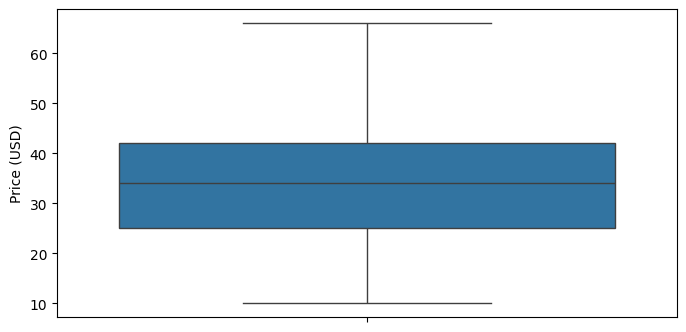

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

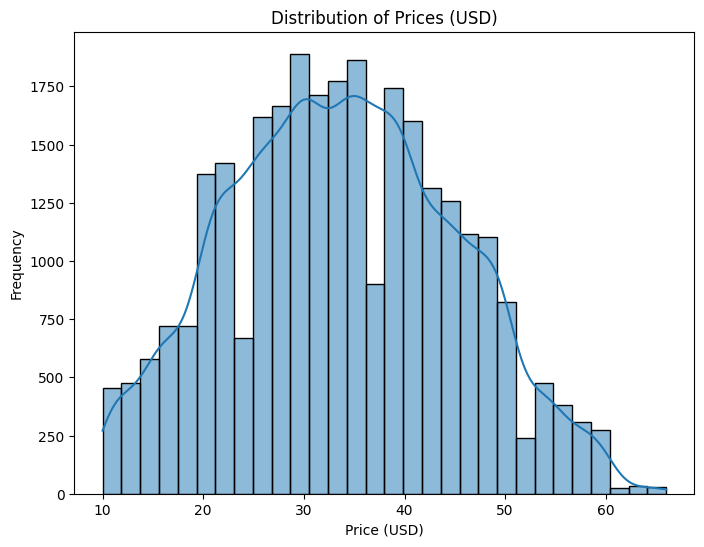

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


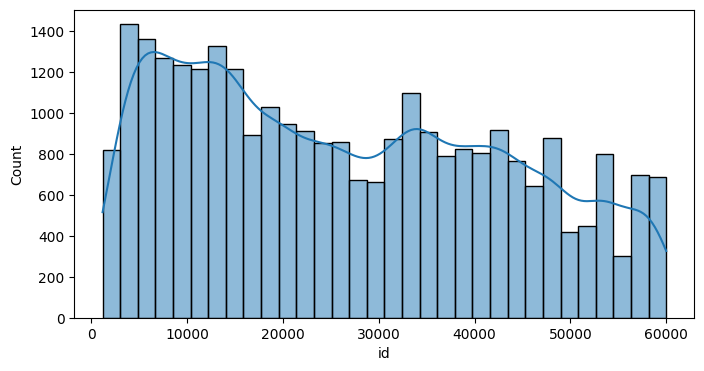

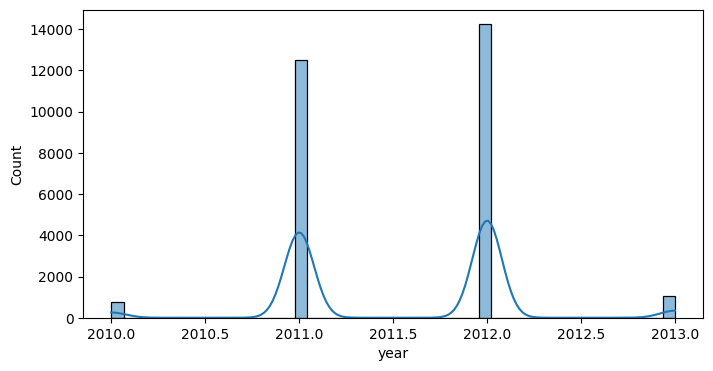

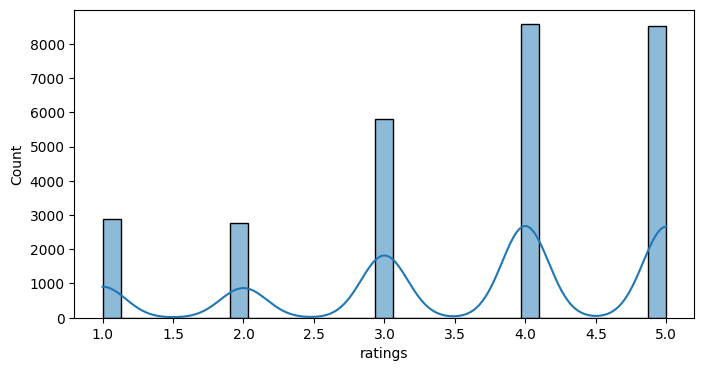

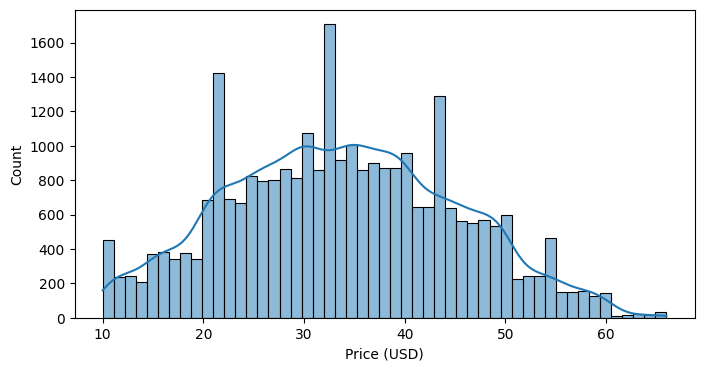

In [ ]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


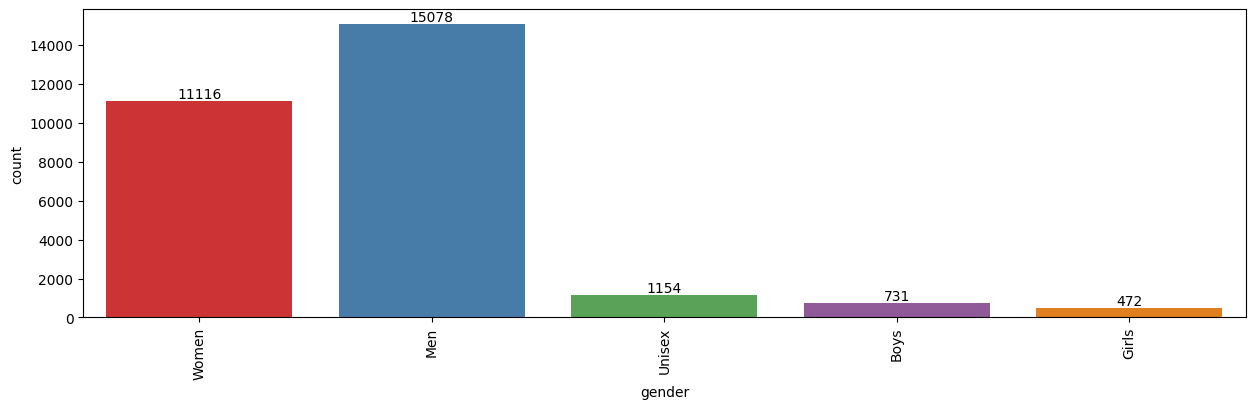

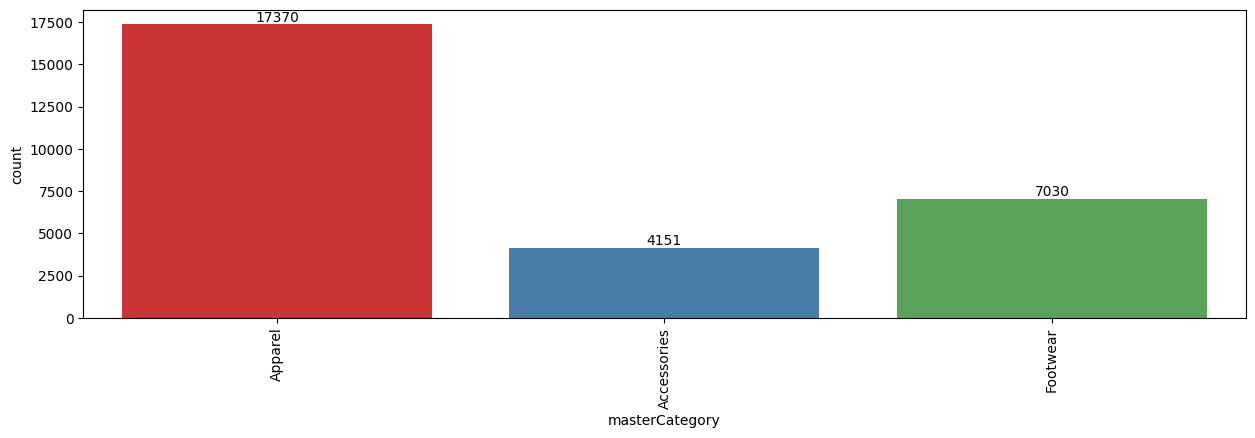

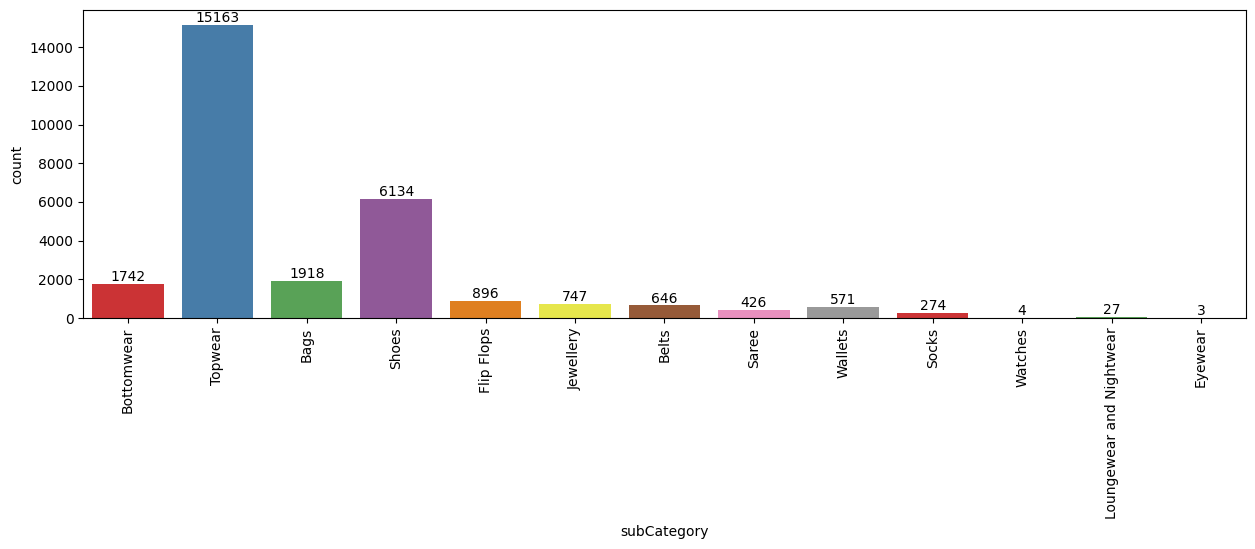

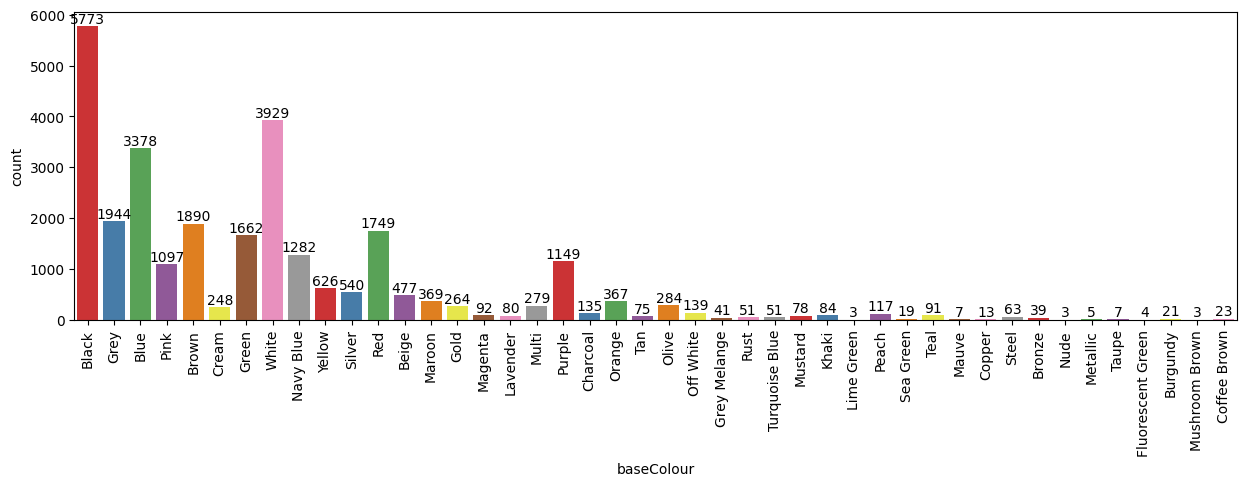

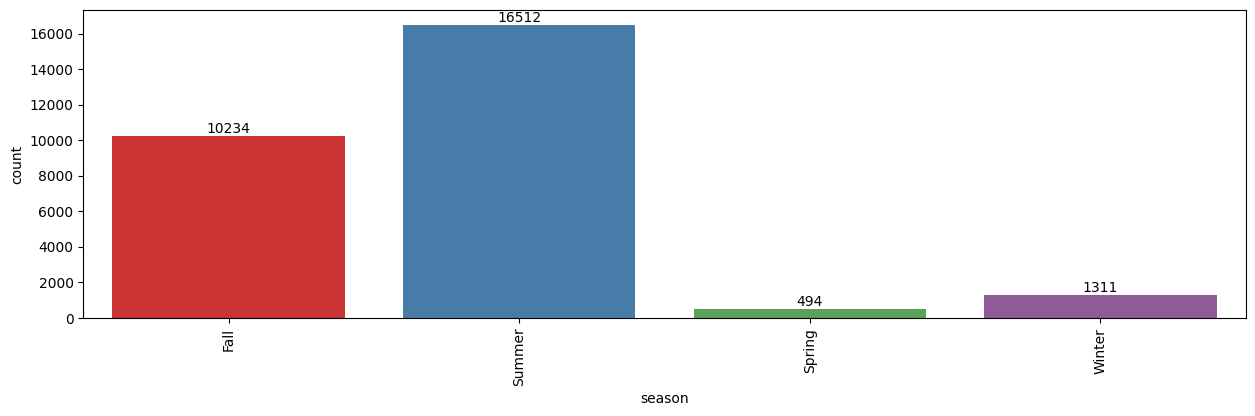

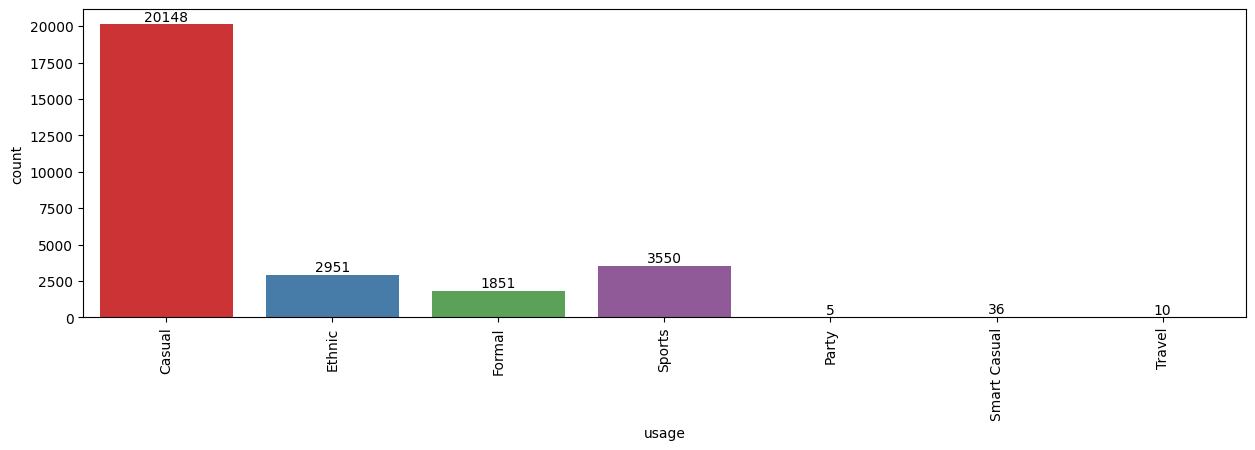

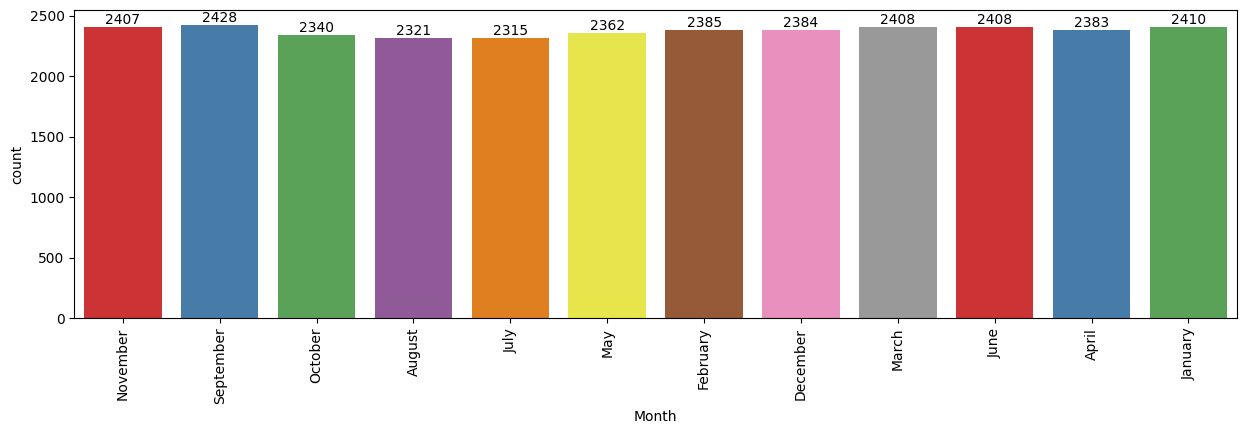

In [ ]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

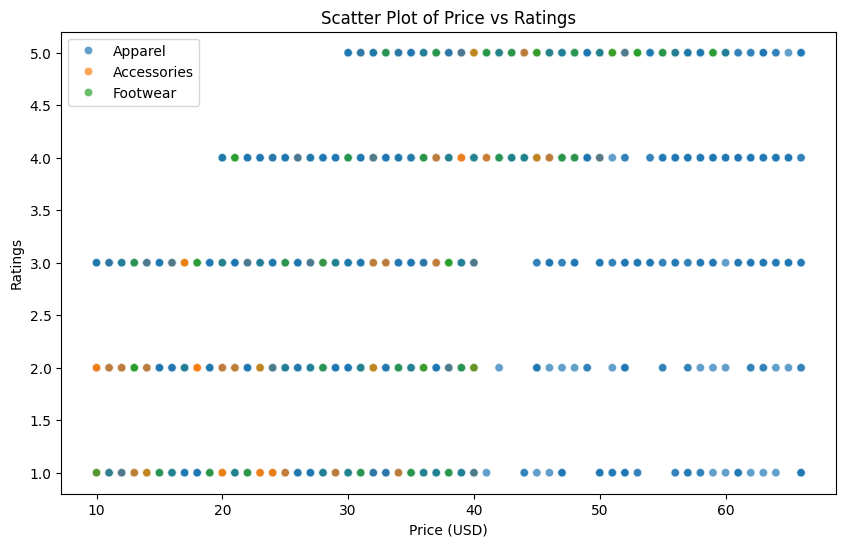

In [ ]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

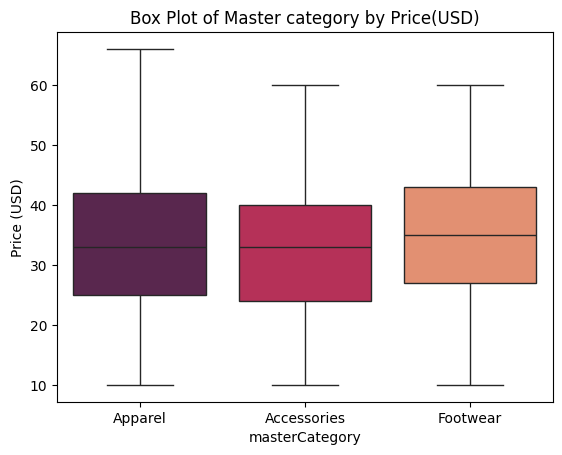

In [ ]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

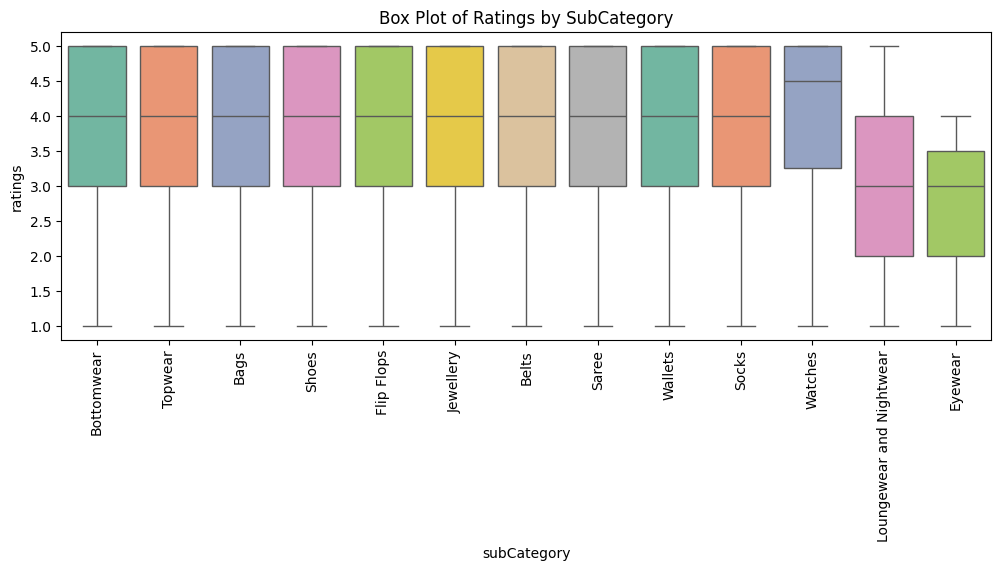

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

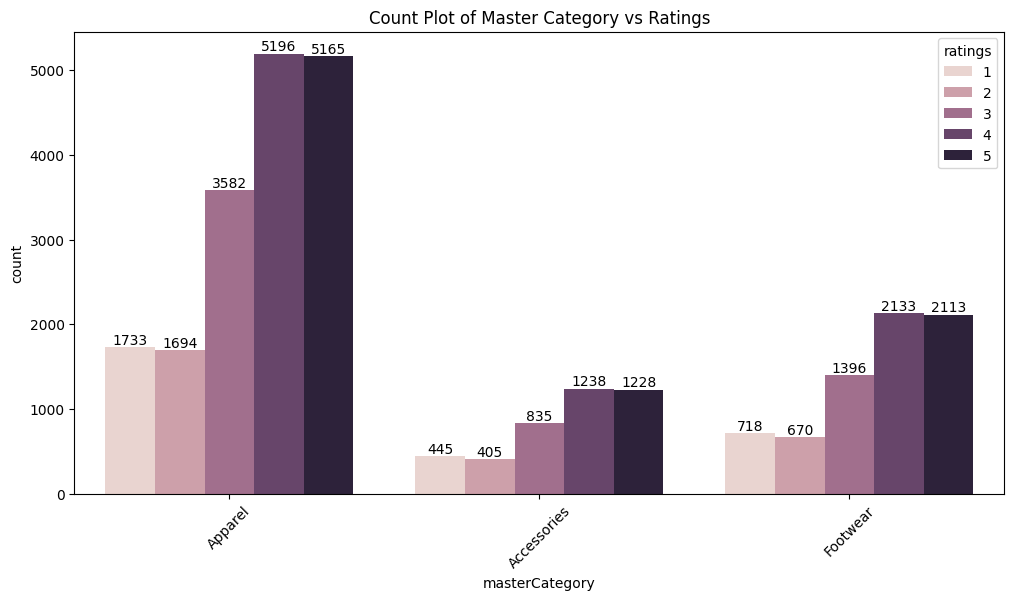

In [ ]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

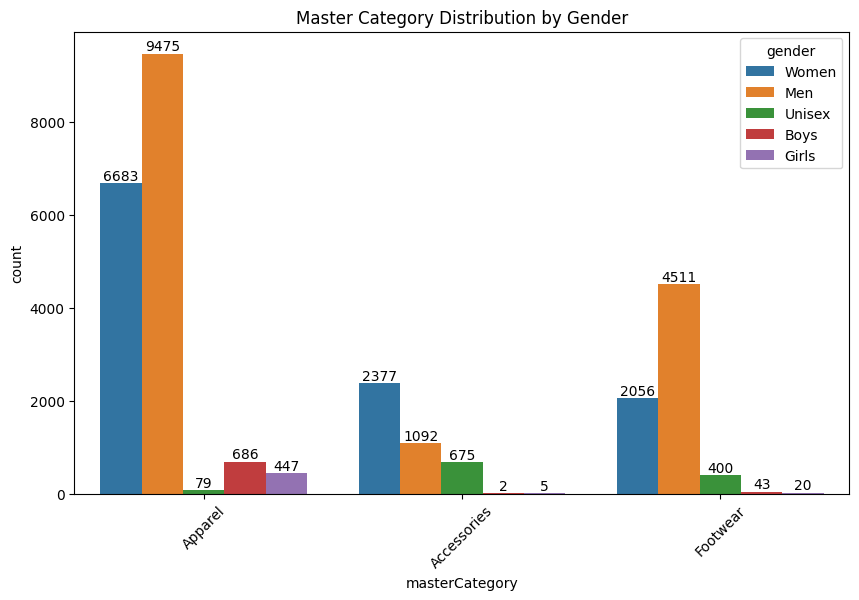

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

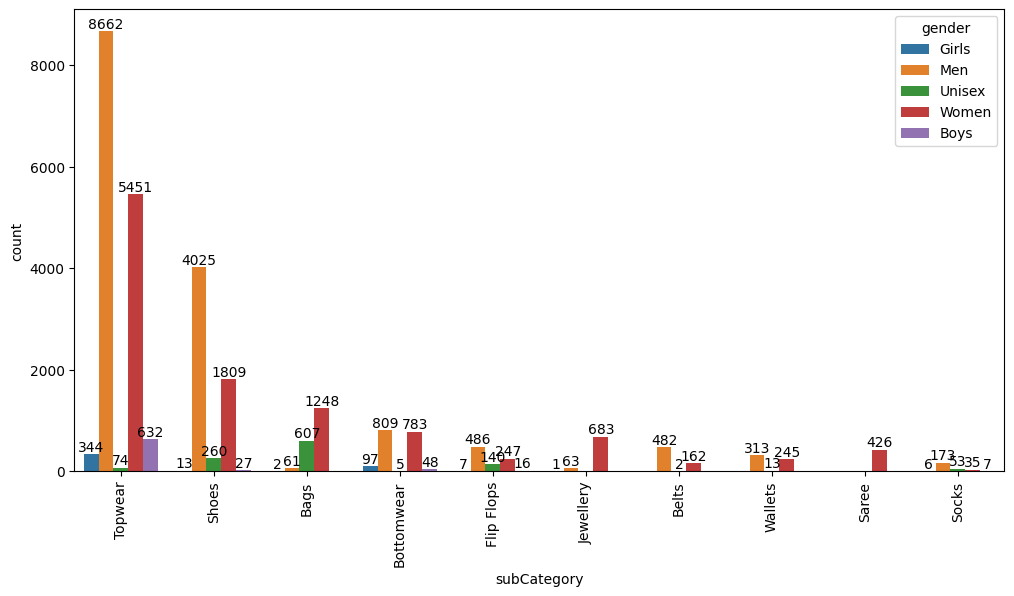

In [ ]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

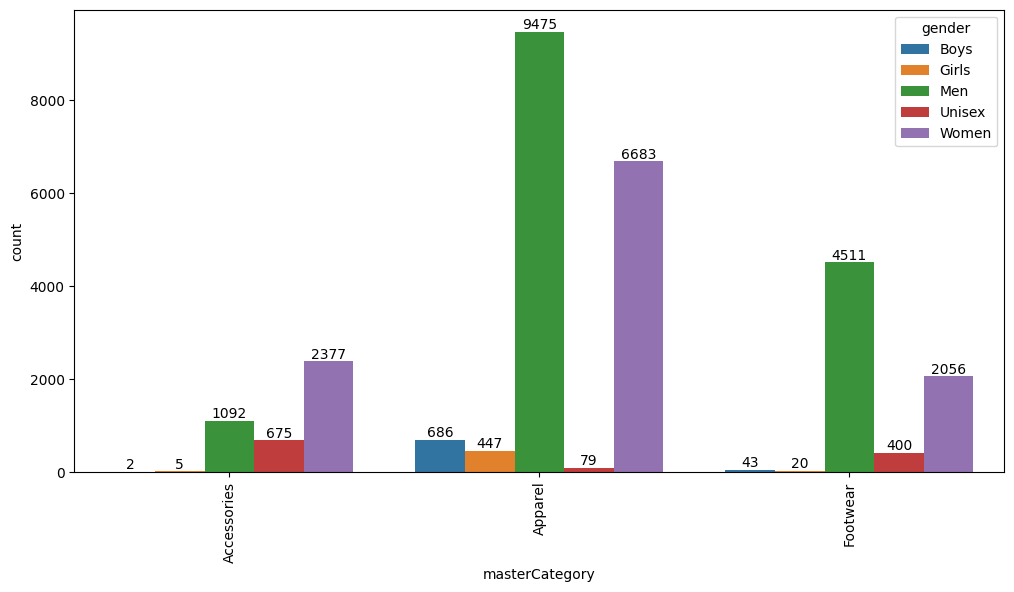

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

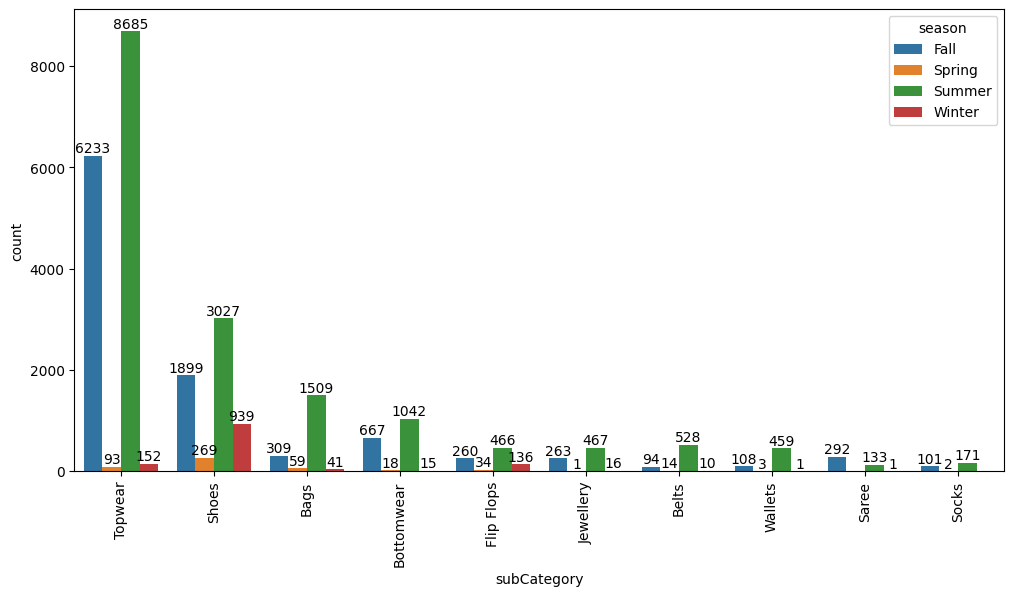

In [ ]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

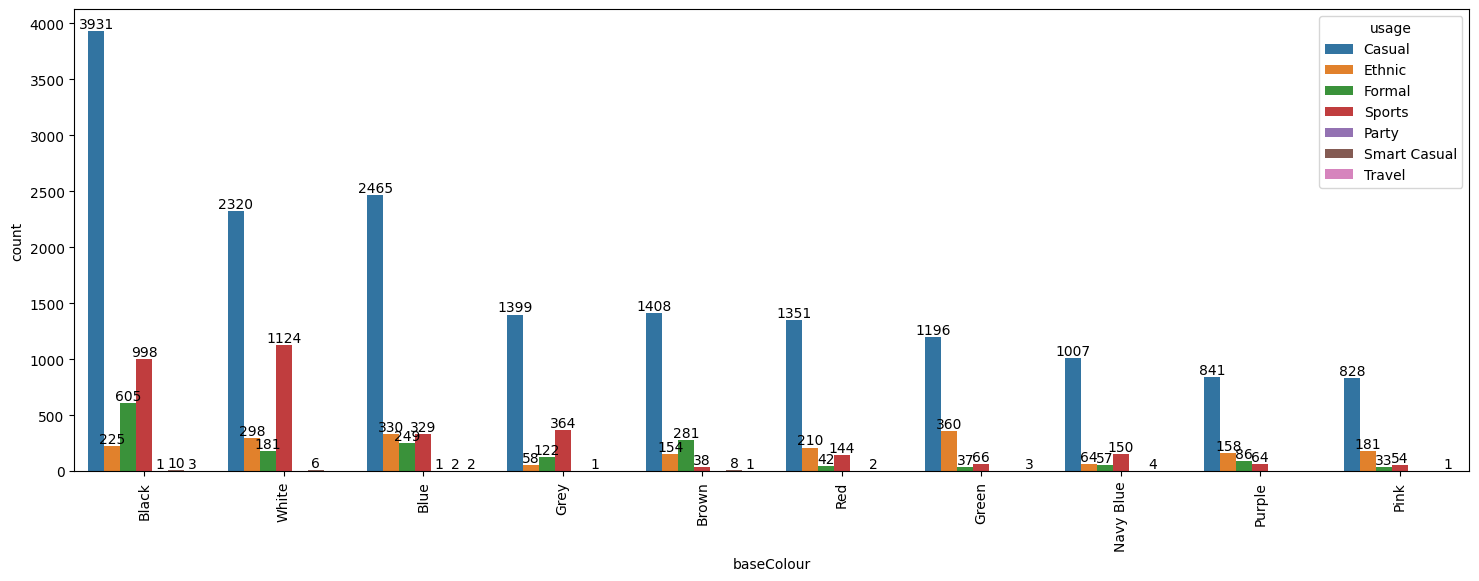

In [ ]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

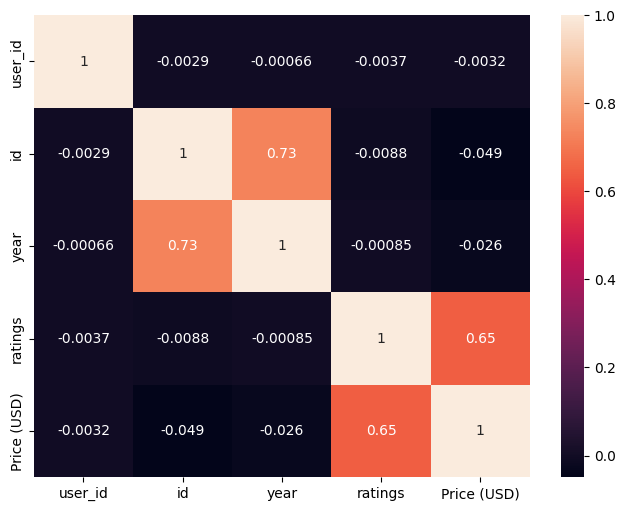

In [ ]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Tren analysis based on Month data</h3>

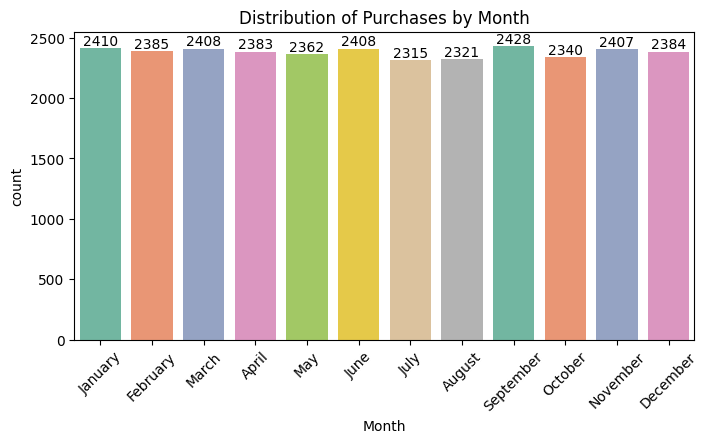

In [ ]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

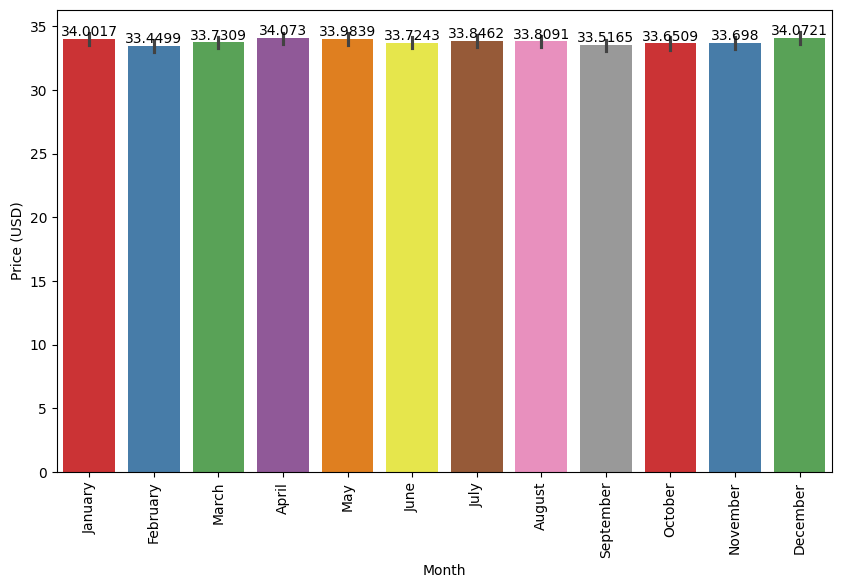

In [ ]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

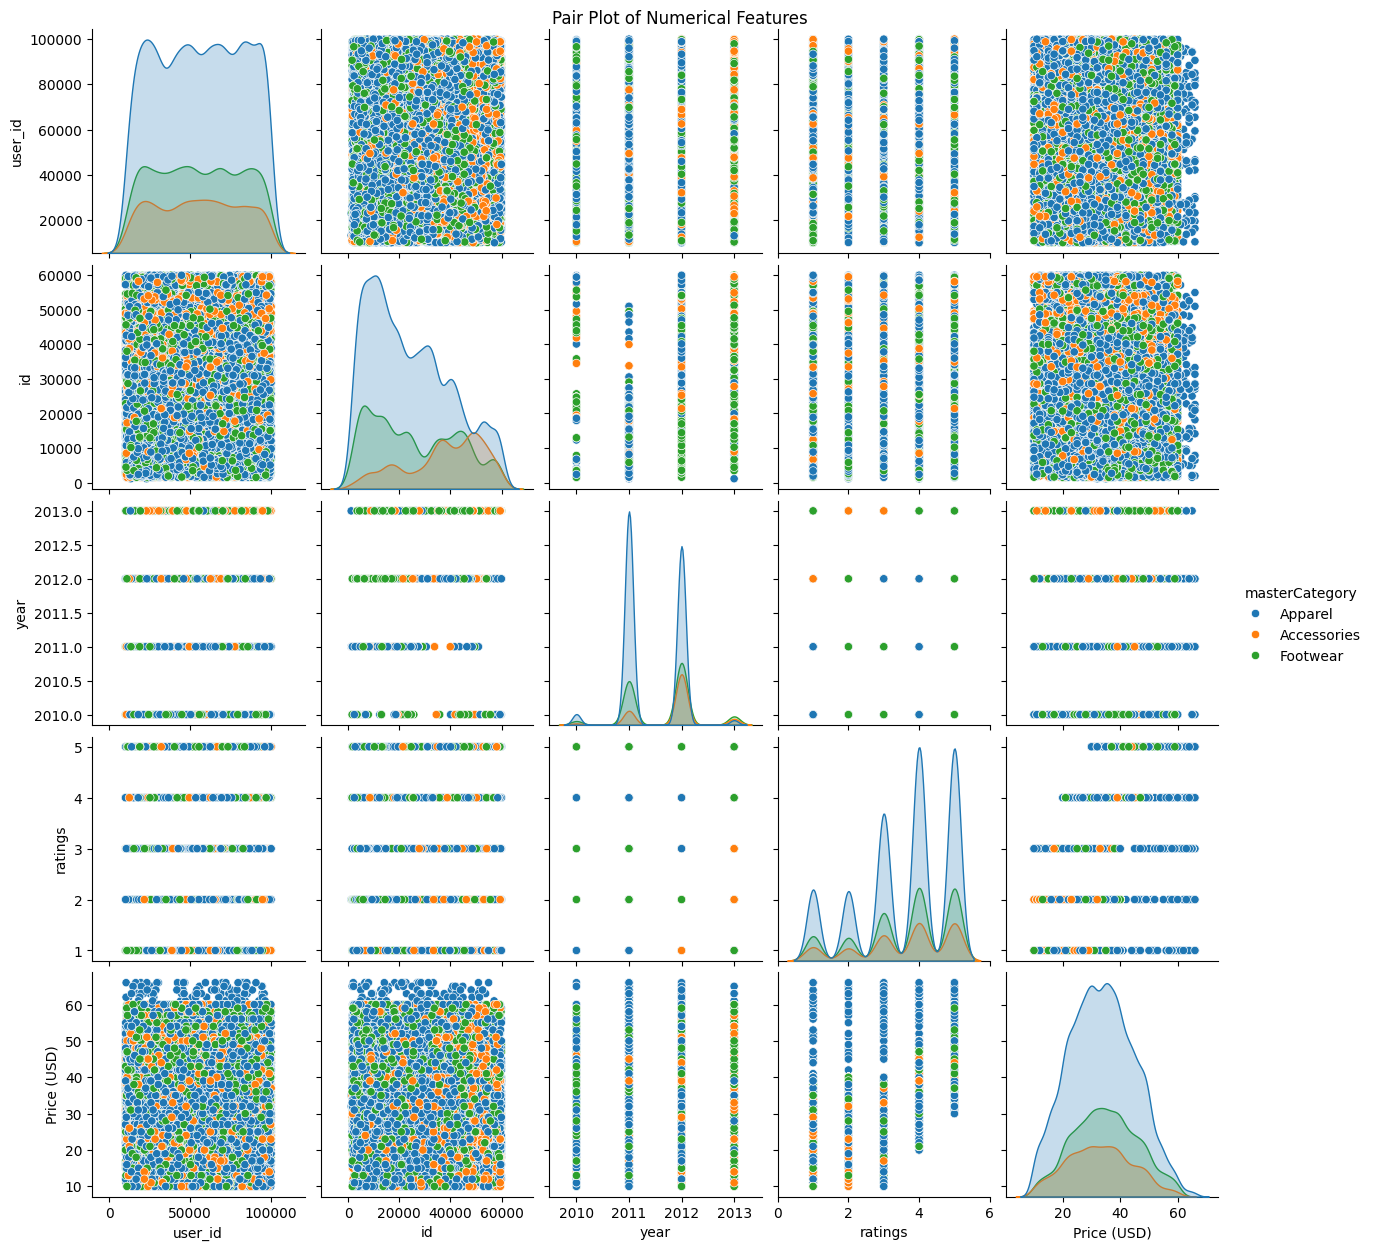

In [ ]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [ ]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [ ]:
df_balanced.year.value_counts()

year
2011.0    7137
2012.0    7137
2010.0    7137
2013.0    7137
Name: count, dtype: int64

In [ ]:
df_balanced.head()

user_id     id gender masterCategory subCategory   articleType  \
16573    19828  23248    Men       Footwear       Shoes  Formal Shoes   
1968     54541  20191    Men        Apparel     Topwear       Tshirts   
12353    72493  13836    Men        Apparel  Bottomwear        Shorts   
11940    40735  15577   Boys        Apparel     Topwear       Tshirts   
27269    98470   7768    Men        Apparel     Topwear       Tshirts   

      baseColour  season    year   usage  \
16573      Brown    Fall  2011.0  Formal   
1968        Grey    Fall  2011.0  Casual   
12353  Navy Blue    Fall  2011.0  Casual   
11940       Blue    Fall  2011.0  Casual   
27269       Grey  Summer  2011.0  Sports   

                                productDisplayName   filename  \
16573                  Arrow Men Formal Brown Shoe  23248.jpg   
1968                Wrangler Men Grey Polo T-shirt  20191.jpg   
12353           Probase Men Solid Navy Blue Shorts  13836.jpg   
11940  Chhota Bheem Kids Boys Warrior Bheem TShirt  15577.jpg   
27269  Nike Men's As Vapor Ulti Grey Black T-Shirt   7768.jpg   

                                                    link  ratings  \
16573  http://assets.myntassets.com/v1/images/style/p...        4   
1968   http://assets.myntassets.com/v1/images/style/p...        5   
12353  http://assets.myntassets.com/v1/images/style/p...        1   
11940  http://assets.myntassets.com/v1/images/style/p...        5   
27269  http://assets.myntassets.com/v1/images/style/p...        3   

                                                  review     Month  \
16573              High quality fabric, very satisfied..  February   
1968   Perfect for any occasion, great buy. for casua...    August   
12353  Very disappointed, won't buy again. for specia...     March   
11940  Perfect for any occasion, great buy. for speci...   October   
27269  Fair product, but don't expect much. for every...  November   

       Price (USD)  
16573           39  
1968            44  
12353           56  
11940           55  
27269           20

<Axes: xlabel='year', ylabel='Count'>

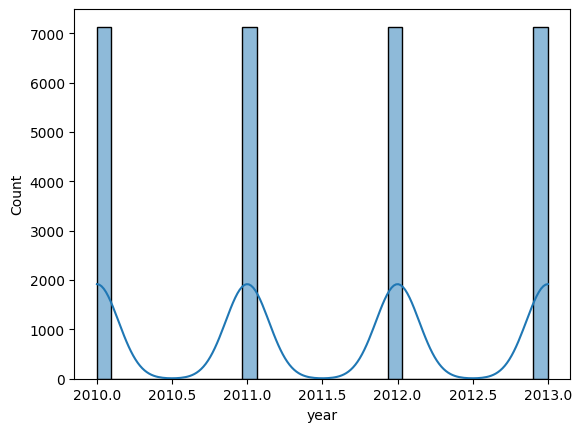

In [ ]:
sns.histplot(df_balanced["year"],kde=True)

# Advanced EDA

<h3>clustering analysis</h3>

In [ ]:
df.shape

(28551, 17)

In [ ]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [ ]:
df_encoded

user_id     id  gender  masterCategory  subCategory  articleType  \
0        93810   8493       4               1            2           46   
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           63   
4        28289  12868       2               2            8           16   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0               1       0  2011.0      0   
1              13       2  2012.0      1   
2               1       2  2011.0      0   
3               2       2  2012.0      0   
4               1       1  2012.0      2   
...           ...     ...     ...    ...   
28546          29       2  2012.0      5   
28547          42       0  2011.0      5   
28548           1       2  2013.0      2   
28549           1       2  2012.0      0   
28550          25       3  2011.0      0   

                                      productDisplayName   filename  \
0                         Forever New Women Black Skirts   8493.jpg   
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        5   
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review  Month  Price (USD)  
0      Amazing quality! Definitely recommend. Would r...      9           46  
1                  Perfect for any occasion, great buy..     11           29  
2                           It's okay, nothing special.!     10           39  
3      Comfortable and stylish, worth the price. and ...      1           39  
4      Satisfactory for the price. for special occasi...      1           24  
...                                                  ...    ...          ...  
28546  Exceeded expectations, love the fit! but could...     11           41  
28547  Perfect for any occasion, great buy. and I'm v...      4           53  
28548              Exceeded expectations, love the fit!.      9           43  
28549  High quality fabric, very satisfied. and I'm v...      9           48  
28550            Not as de

In [ ]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])

In [ ]:
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [ ]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [ ]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

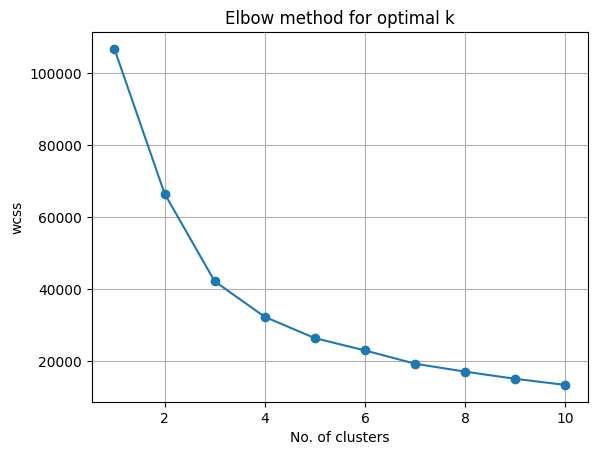

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [ ]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

pca1      pca2
0     -0.429872  1.532470
1     -0.436964 -0.014366
2     -2.464212  0.116658
3      0.264773  1.068773
4     -0.197315 -0.542015
...         ...       ...
28546  0.943306  1.384033
28547  2.547851  1.992272
28548 -1.120116  1.742129
28549 -1.313849  1.894369
28550 -0.851451 -1.934678

[28551 rows x 2 columns]

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

pca1      pca2  cluster
0     -0.429872  1.532470        0
1     -0.436964 -0.014366        1
2     -2.464212  0.116658        1
3      0.264773  1.068773        0
4     -0.197315 -0.542015        2
...         ...       ...      ...
28546  0.943306  1.384033        0
28547  2.547851  1.992272        0
28548 -1.120116  1.742129        1
28549 -1.313849  1.894369        1
28550 -0.851451 -1.934678        2

[28551 rows x 3 columns]

In [ ]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [ ]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [ ]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

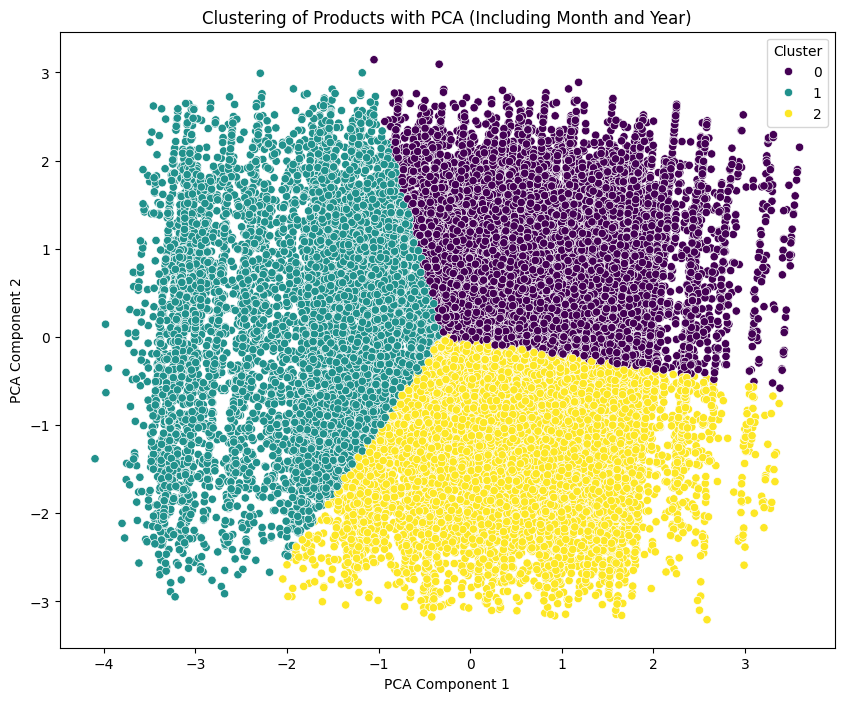

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df.shape

(28551, 18)

***image processing***

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image processing parameters
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [ ]:
image_folder ="/content/drive/MyDrive/images"

In [ ]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [ ]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: /content/drive/MyDrive/images/8493.jpg
File does not exist: /content/drive/MyDrive/images/39425.jpg
File does not exist: /content/drive/MyDrive/images/12347.jpg


In [ ]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

user_id     id  gender masterCategory subCategory   articleType  \
1        24592  30757     Men        Apparel     Topwear        Kurtas   
2        13278  14881   Women    Accessories        Bags      Handbags   
3        46048  48449     Men        Apparel     Topwear       Tshirts   
4        28289  12868     Men       Footwear       Shoes  Formal Shoes   
5        23434  17968     Men       Footwear  Flip Flops    Flip Flops   
...        ...    ...     ...            ...         ...           ...   
28546    73318  54078     Men       Footwear       Shoes  Sports Shoes   
28547    18851  13183     Men       Footwear       Shoes  Sports Shoes   
28548    55457  10264     Men       Footwear       Shoes  Formal Shoes   
28549    40311  45378   Women       Footwear       Shoes         Flats   
28550    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
1           Grey  Summer  2012.0  Ethnic   
2          Black  Summer  2011.0  Casual   
3           Blue  Summer  2012.0  Casual   
4          Black  Spring  2012.0  Formal   
5          Black    Fall  2011.0  Casual   
...          ...     ...     ...     ...   
28546     Orange  Summer  2012.0  Sports   
28547      White    Fall  2011.0  Sports   
28548      Black  Summer  2013.0  Formal   
28549      Black  Summer  2012.0  Casual   
28550  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
5                          Puma Men Splash Black Slipper  17968.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
5      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
5                  Exceeded expectations, love the fit!!       July   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

       Price (USD)  cluster  
1               29      

In [ ]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [ ]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 28548


In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [ ]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [ ]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 893


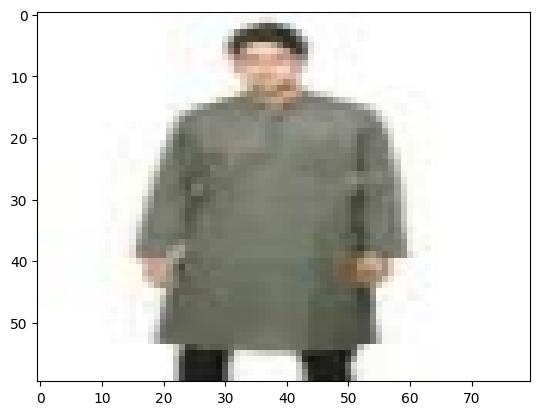

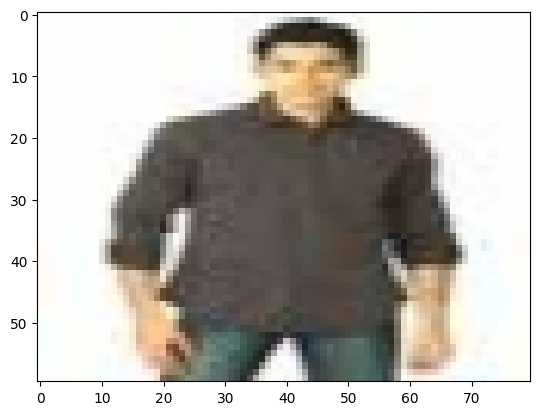

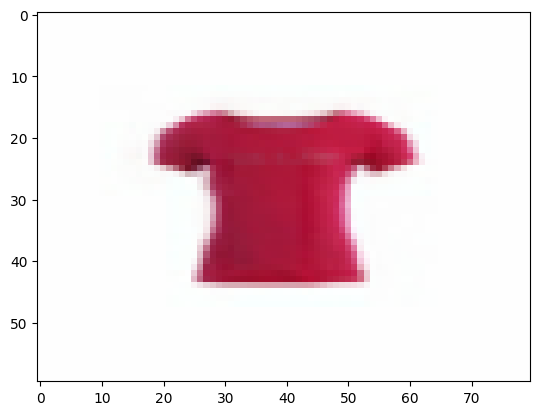

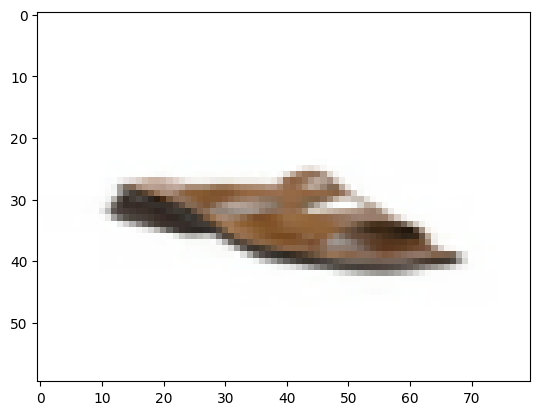

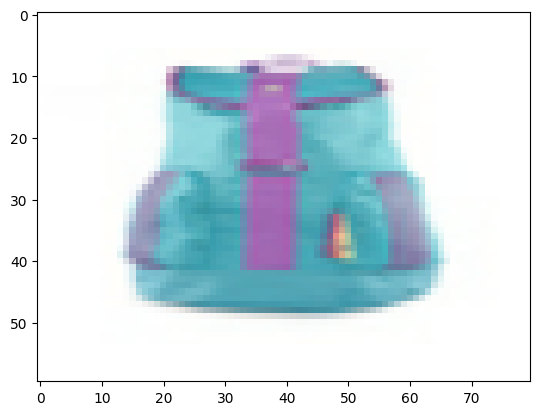

In [ ]:
for images_batch in dataset.take(5):
    plt.imshow(images_batch[0])
    plt.show()

# ***Content-based filtering***

In [ ]:
df

user_id     id  gender masterCategory subCategory   articleType  \
1        24592  30757     Men        Apparel     Topwear        Kurtas   
2        13278  14881   Women    Accessories        Bags      Handbags   
3        46048  48449     Men        Apparel     Topwear       Tshirts   
4        28289  12868     Men       Footwear       Shoes  Formal Shoes   
5        23434  17968     Men       Footwear  Flip Flops    Flip Flops   
...        ...    ...     ...            ...         ...           ...   
28546    73318  54078     Men       Footwear       Shoes  Sports Shoes   
28547    18851  13183     Men       Footwear       Shoes  Sports Shoes   
28548    55457  10264     Men       Footwear       Shoes  Formal Shoes   
28549    40311  45378   Women       Footwear       Shoes         Flats   
28550    85631   5864  Unisex       Footwear       Shoes  Casual Shoes   

      baseColour  season    year   usage  \
1           Grey  Summer  2012.0  Ethnic   
2          Black  Summer  2011.0  Casual   
3           Blue  Summer  2012.0  Casual   
4          Black  Spring  2012.0  Formal   
5          Black    Fall  2011.0  Casual   
...          ...     ...     ...     ...   
28546     Orange  Summer  2012.0  Sports   
28547      White    Fall  2011.0  Sports   
28548      Black  Summer  2013.0  Formal   
28549      Black  Summer  2012.0  Casual   
28550  Navy Blue  Winter  2011.0  Casual   

                                      productDisplayName   filename  \
1                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
3                     French Connection Men Blue T-shirt  48449.jpg   
4                      Lee Cooper Men Formal Black Shoes  12868.jpg   
5                          Puma Men Splash Black Slipper  17968.jpg   
...                                                  ...        ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28547                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28548    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28549                          Rocia Women Black Sandals  45378.jpg   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
1      http://assets.myntassets.com/v1/images/style/p...        4   
2      http://assets.myntassets.com/v1/images/style/p...        3   
3      http://assets.myntassets.com/v1/images/style/p...        5   
4      http://assets.myntassets.com/v1/images/style/p...        3   
5      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        5   
28548  http://assets.myntassets.com/v1/images/style/p...        5   
28549  http://assets.myntassets.com/v1/images/style/p...        5   
28550  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review      Month  \
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
5                  Exceeded expectations, love the fit!!       July   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

       Price (USD)  cluster  
1               29      

In [ ]:
df.columns

Index(['user_id', 'id', 'gender', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'filename', 'link', 'ratings', 'review', 'Month',
       'Price (USD)', 'cluster'],
      dtype='object')

In [ ]:
numnames

['id', 'year', 'ratings', 'Price (USD)']

In [ ]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [ ]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
masterCategory_mapping = {label: idx for label, idx in zip(le_dict['masterCategory'].classes_, le_dict['masterCategory'].transform(le_dict['masterCategory'].classes_))}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Master Category Mapping (Original to Encoded):", masterCategory_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
       user_id     id  gender  masterCategory  subCategory  articleType  \
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           62   
4        28289  12868       2               2            8           16   
5        23434  17968       2               2            4           15   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
1              13       2  2012.0   

In [ ]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

user_id     id  gender  masterCategory  subCategory  articleType  \
0        24592  30757       2               1           10           23   
1        13278  14881       4               0            0           17   
2        46048  48449       2               1           10           62   
3        28289  12868       2               2            8           16   
4        23434  17968       2               2            4           15   
...        ...    ...     ...             ...          ...          ...   
28543    73318  54078       2               2            8           48   
28544    18851  13183       2               2            8           48   
28545    55457  10264       2               2            8           16   
28546    40311  45378       4               2            8           14   
28547    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0              13       2  2012.0      1   
1               1       2  2011.0      0   
2               2       2  2012.0      0   
3               1       1  2012.0      2   
4               1       0  2011.0      0   
...           ...     ...     ...    ...   
28543          29       2  2012.0      5   
28544          42       0  2011.0      5   
28545           1       2  2013.0      2   
28546           1       2  2012.0      0   
28547          25       3  2011.0      0   

                                      productDisplayName   filename  \
0                     Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
1      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
2                     French Connection Men Blue T-shirt  48449.jpg   
3                      Lee Cooper Men Formal Black Shoes  12868.jpg   
4                          Puma Men Splash Black Slipper  17968.jpg   
...                                                  ...        ...   
28543    ADIDAS Men Orange F50 Adizero HG Football Shoes  54078.jpg   
28544                 Fila Men Dls 96 White Sports Shoes  13183.jpg   
28545    Clarks Men Goya Band Leather Black Formal Shoes  10264.jpg   
28546                          Rocia Women Black Sandals  45378.jpg   
28547  Converse Chuck Taylor All Star Unisex Navy Blu...   5864.jpg   

                                                    link  ratings  \
0      http://assets.myntassets.com/v1/images/style/p...        4   
1      http://assets.myntassets.com/v1/images/style/p...        3   
2      http://assets.myntassets.com/v1/images/style/p...        5   
3      http://assets.myntassets.com/v1/images/style/p...        3   
4      http://assets.myntassets.com/v1/images/style/p...        4   
...                                                  ...      ...   
28543  http://assets.myntassets.com/v1/images/style/p...        5   
28544  http://assets.myntassets.com/v1/images/style/p...        5   
28545  http://assets.myntassets.com/v1/images/style/p...        5   
28546  http://assets.myntassets.com/v1/images/style/p...        5   
28547  http://assets.myntassets.com/v1/images/style/p...        2   

                                                  review  Month  Price (USD)  \
0                  Perfect for any occasion, great buy..     11           29   
1                           It's okay, nothing special.!     10           39   
2      Comfortable and stylish, worth the price. and ...      1           39   
3      Satisfactory for the price. for special occasi...      1           24   
4                  Exceeded expectations, love the fit!!      5           50   
...                                                  ...    ...          ...   
28543  Exceeded expectations, love the fit! but could...     11           41   
28544  Perfect for any occasion, great buy. and I'm v...      4           53   
28545              Exceeded expectations, love the fit!.      9           43   
28546  High quality fabric, very satisfied. and I'm v...      9           48   
28547          

In [ ]:
df_encoded.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [ ]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

id  gender  masterCategory  subCategory  articleType  baseColour  \
0      30757       2               1           10           23          13   
1      14881       4               0            0           17           1   
2      48449       2               1           10           62           2   
3      12868       2               2            8           16           1   
4      17968       2               2            4           15           1   
...      ...     ...             ...          ...          ...         ...   
28543  54078       2               2            8           48          29   
28544  13183       2               2            8           48          42   
28545  10264       2               2            8           16           1   
28546  45378       4               2            8           14           1   
28547   5864       3               2            8            7          25   

       season  usage                                 productDisplayName  \
0           2      1                 Fabindia Men Grey Mangalgiri Kurta   
1           2      0  United Colors of Benetton Women Solid Black Ha...   
2           2      0                 French Connection Men Blue T-shirt   
3           1      2                  Lee Cooper Men Formal Black Shoes   
4           0      0                      Puma Men Splash Black Slipper   
...       ...    ...                                                ...   
28543       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
28544       0      5                 Fila Men Dls 96 White Sports Shoes   
28545       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
28546       2      0                          Rocia Women Black Sandals   
28547       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

       Month  cluster   ratings  Price (USD)      year  
0         11        1  0.315497    -0.423862  0.745031  
1         10        1 -0.465599     0.459915 -0.890805  
2          1        0  1.096594     0.459915  0.745031  
3          1        2 -0.465599    -0.865751  0.745031  
4          5        0  0.315497     1.432070 -0.890805  
...      ...      ...       ...          ...       ...  
28543     11        0  1.096594     0.636671  0.745031  
28544      4        0  1.096594     1.697203 -0.890805  
28545      9        1  1.096594     0.813426  2.380867  
28546      9        1  1.096594     1.255315  0.745031  
28547      3        2 -1.246695    -1.837905 -0.890805  

[28548 rows x 14 columns]

In [ ]:
# subset_size = 2000
# df_sample = df.sample(n=subset_size, random_state=42)
# df_sample.reset_index(drop=True, inplace=True)
# df_sample

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Flip Flops','Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)


Encoded Complementary Map: {10: [2, 4, 8, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 2, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 4, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [ ]:
df['subCategory'].unique()

array(['Topwear', 'Bags', 'Shoes', 'Flip Flops', 'Bottomwear',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

In [ ]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [ ]:
processed_dataset[processed_dataset.subCategory==7].id

42       57964
77       53044
86       34981
105      59598
131      49927
         ...  
28160    50910
28237    59670
28276    49928
28357    59667
28366    59614
Name: id, Length: 426, dtype: int64

In [ ]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Color Map:", encoded_complementary_colour_map)

Encoded Complementary Color Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the index and details of the target product
    try:
        product_index = df_encoded[df_encoded['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract TF-IDF vector for the target product
    target_vector = tfidf_matrix[product_index]

    # Get target product's attributes
    encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
    product_gender = df_encoded.loc[product_index, 'gender']
    encoded_colour = df_encoded.loc[product_index, 'baseColour']
    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
    print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

    # Initialize recommendations dictionary for unique items from each complementary subcategory
    recommendations = {}
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])
    footwear_selected = False  # Track if a footwear item has already been added

    for idx, row in df_encoded.iterrows():
        # Skip the target item itself
        if idx == product_index:
            continue

        # Compute similarity score with the target item
        item_vector = tfidf_matrix[idx]
        similarity_score = cosine_similarity(target_vector, item_vector.reshape(1, -1))[0][0]

        # Retrieve details of the current item
        recommended_subcategory = row['subCategory']
        recommended_master_category = row['masterCategory']
        recommended_colour = row['baseColour']

        # Check conditions for complementary subcategory, gender, color contrast, and footwear restriction
        if (recommended_subcategory in complementary_subcategories and
            row['gender'] == product_gender and
            recommended_colour in complementary_colours):

            # If the item belongs to 'Footwear', ensure only one item is selected
            if recommended_master_category == 2:
                if footwear_selected:
                    continue  # Skip if a footwear item is already added
                else:
                    footwear_selected = True  # Mark footwear as selected

            # Add or replace recommendation if this item has higher similarity
            if (recommended_subcategory not in recommendations or
                recommendations[recommended_subcategory][1] < similarity_score):

                recommendations[recommended_subcategory] = (row['id'], similarity_score)

            # Stop if all complementary subcategories are covered
            if len(recommendations) == len(complementary_subcategories):
                break

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    if len(recommended_product_ids) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommended_product_ids


In [ ]:
processed_dataset.id.sample(5)

1235      9520
8825      3770
20198     4128
25765    27874
10874    52895
Name: id, dtype: int64

In [ ]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [ ]:
gender_mapping

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}

In [ ]:
df_encoded.head()

user_id     id  gender  masterCategory  subCategory  articleType  \
0    24592  30757       2               1           10           23   
1    13278  14881       4               0            0           17   
2    46048  48449       2               1           10           62   
3    28289  12868       2               2            8           16   
4    23434  17968       2               2            4           15   

   baseColour  season    year  usage  \
0          13       2  2012.0      1   
1           1       2  2011.0      0   
2           2       2  2012.0      0   
3           1       1  2012.0      2   
4           1       0  2011.0      0   

                                  productDisplayName   filename  \
0                 Fabindia Men Grey Mangalgiri Kurta  30757.jpg   
1  United Colors of Benetton Women Solid Black Ha...  14881.jpg   
2                 French Connection Men Blue T-shirt  48449.jpg   
3                  Lee Cooper Men Formal Black Shoes  12868.jpg   
4                      Puma Men Splash Black Slipper  17968.jpg   

                                                link  ratings  \
0  http://assets.myntassets.com/v1/images/style/p...        4   
1  http://assets.myntassets.com/v1/images/style/p...        3   
2  http://assets.myntassets.com/v1/images/style/p...        5   
3  http://assets.myntassets.com/v1/images/style/p...        3   
4  http://assets.myntassets.com/v1/images/style/p...        4   

                                              review  Month  Price (USD)  \
0              Perfect for any occasion, great buy..     11           29   
1                       It's okay, nothing special.!     10           39   
2  Comfortable and stylish, worth the price. and ...      1           39   
3  Satisfactory for the price. for special occasi...      1           24   
4              Exceeded expectations, love the fit!!      5           50   

   cluster  
0        1  
1        1  
2        0  
3        2  
4        0

In [ ]:
processed_dataset.head()

id  gender  masterCategory  subCategory  articleType  baseColour  \
0  30757       2               1           10           23          13   
1  14881       4               0            0           17           1   
2  48449       2               1           10           62           2   
3  12868       2               2            8           16           1   
4  17968       2               2            4           15           1   

   season  usage                                 productDisplayName  Month  \
0       2      1                 Fabindia Men Grey Mangalgiri Kurta     11   
1       2      0  United Colors of Benetton Women Solid Black Ha...     10   
2       2      0                 French Connection Men Blue T-shirt      1   
3       1      2                  Lee Cooper Men Formal Black Shoes      1   
4       0      0                      Puma Men Splash Black Slipper      5   

   cluster   ratings  Price (USD)      year  \
0        1  0.315497    -0.423862  0.745031   
1        1 -0.465599     0.459915 -0.890805   
2        0  1.096594     0.459915  0.745031   
3        2 -0.465599    -0.865751  0.745031   
4        0  0.315497     1.432070 -0.890805   

                                   combined_features  
0  2 13 1 10 23 0.7450307834999575 11 0.315497493...  
1  4 1 0 0 17 -0.8908051499991239 10 -0.465598893...  
2  2 2 1 10 62 0.7450307834999575 1 1.09659387940...  
3  2 1 2 8 16 0.7450307834999575 1 -0.46559889333...  
4  2 1 2 4 15 -0.8908051499991239 5 0.31549749303...

In [ ]:
product_id= 53044
recommended_products = get_recommendations(product_id,processed_dataset,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Product Index: 77
Encoded Subcategory: 7, Gender: 4, Colour: 22
Subcategory: Saree
Some complementary subcategories could not be found.
Recommended products: [53066, 43705, 45406]


In [ ]:
from PIL import Image
path_images = []
image_url = "/content/drive/MyDrive/images/"
for i in recommended_products:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['/content/drive/MyDrive/images/53066.jpg',
 '/content/drive/MyDrive/images/43705.jpg',
 '/content/drive/MyDrive/images/45406.jpg']

In [ ]:
import cv2
import numpy as np
from PIL import Image

image_path = f'/content/drive/MyDrive/images/{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

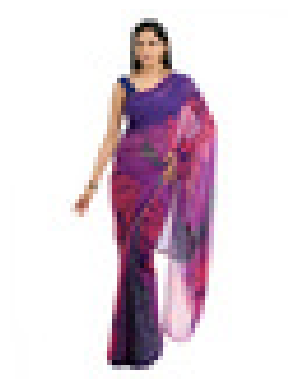

In [ ]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [ ]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

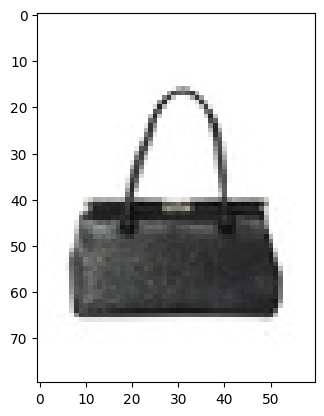

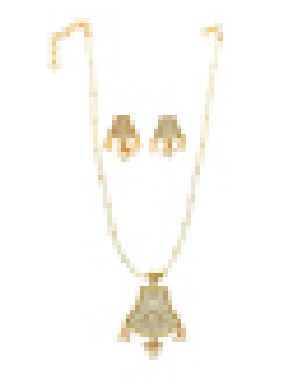

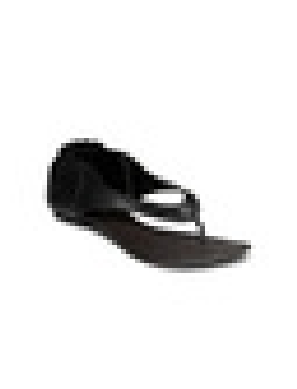

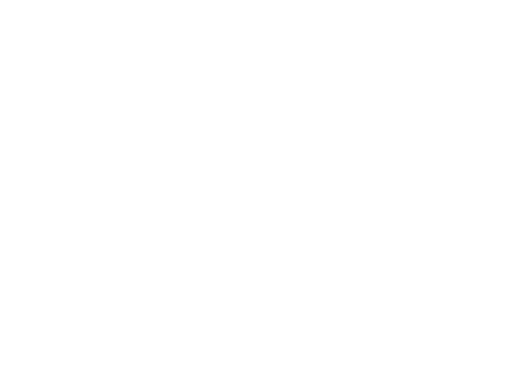

In [ ]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [ ]:
random_product_ids = [(95426, 54872),(29613, 33250),(41608, 8190), (63368, 14978), (69682, 8249), (11581, 48748), (34232, 44689), (89807, 3947), (63225, 40371), (46655, 3969)]

Product Index: 18998
Encoded Subcategory: 5, Gender: 4, Colour: 41
Subcategory: Jewellery
Some complementary subcategories could not be found.
Recommended items: [26943, 50384, 52905, 19264]
Main item:


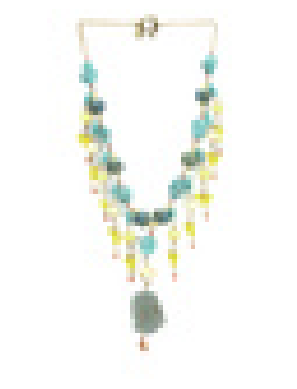

Recommended items:


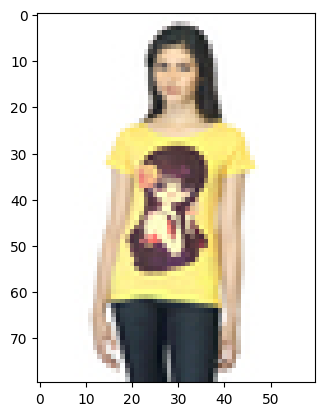

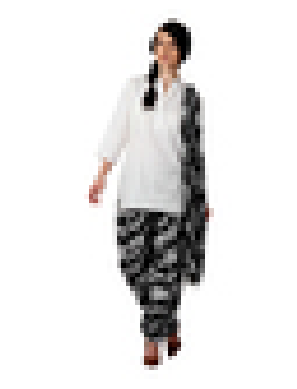

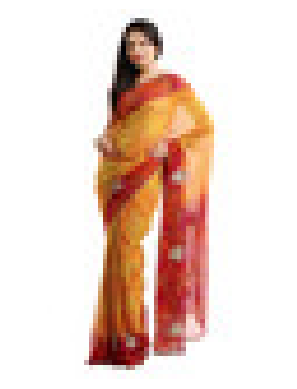

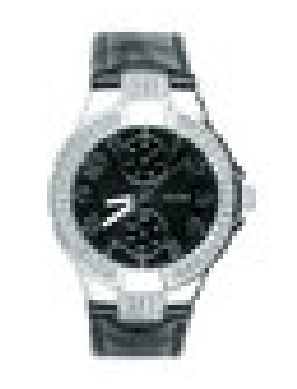

Product Index: 26367
Encoded Subcategory: 10, Gender: 2, Colour: 42
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended items: [12868, 26521, 41268, 41251, 40760]
Main item:


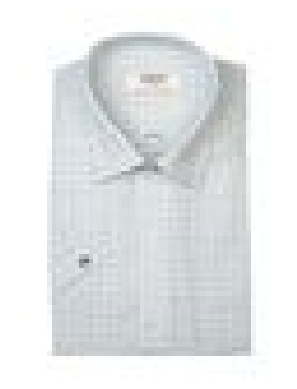

Recommended items:


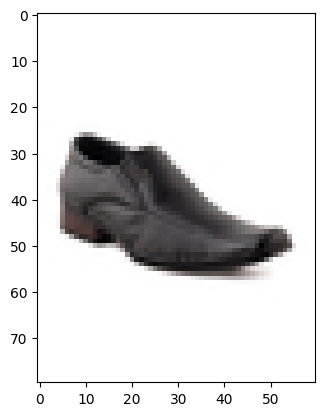

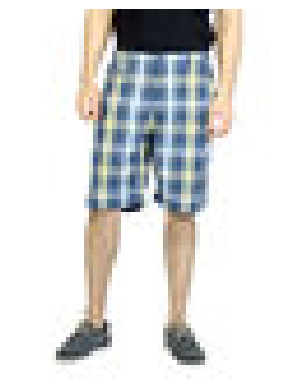

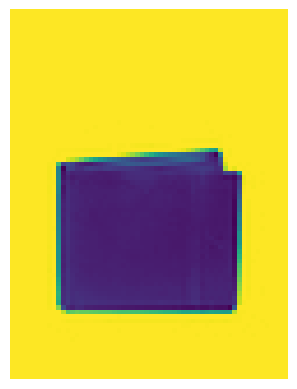

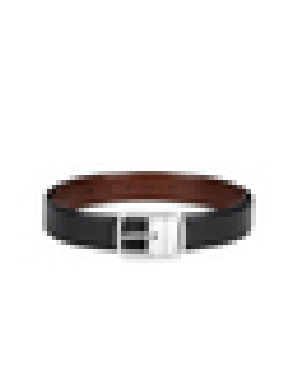

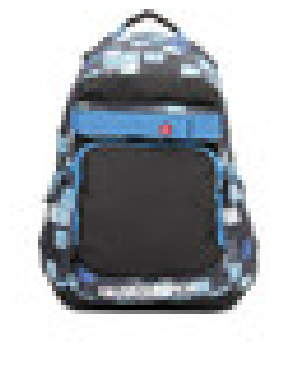

Product Index: 5704
Encoded Subcategory: 10, Gender: 2, Colour: 1
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended items: [41434, 16370, 41530, 14848, 40763]
Main item:


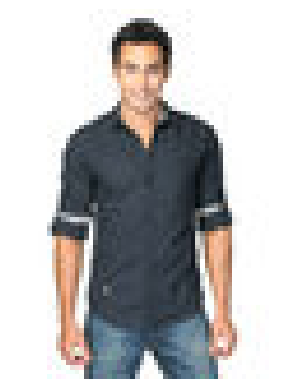

Recommended items:


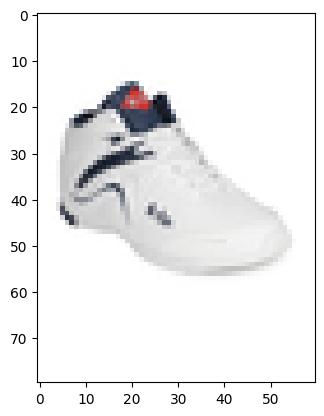

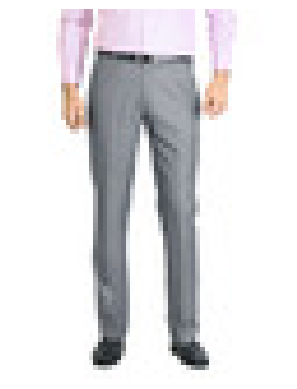

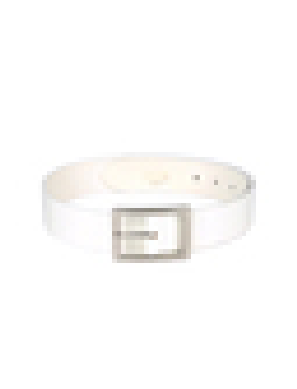

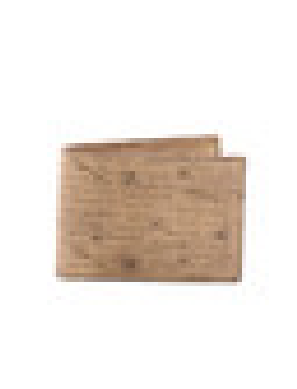

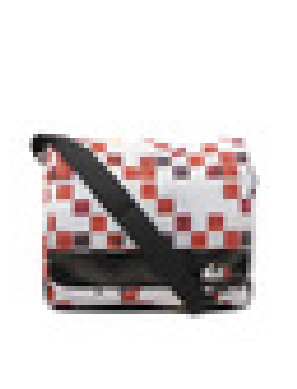

Product Index: 11045
Encoded Subcategory: 1, Gender: 2, Colour: 1
Subcategory: Belts
Some complementary subcategories could not be found.
Recommended items: [22624, 41434, 31032]
Main item:


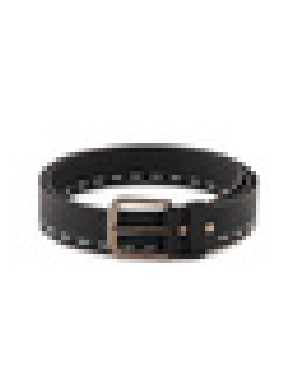

Recommended items:


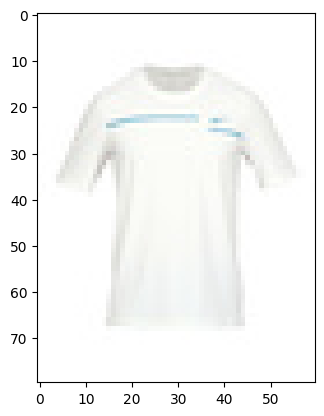

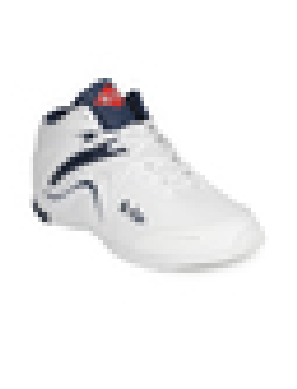

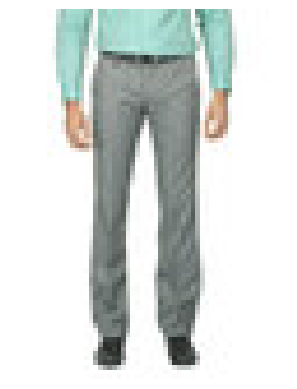

Product Index: 2793
Encoded Subcategory: 8, Gender: 3, Colour: 1
Subcategory: Shoes
Some complementary subcategories could not be found.
Recommended items: [12582, 6691]
Main item:


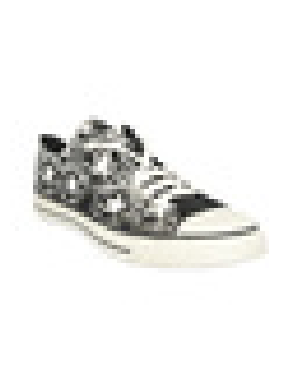

Recommended items:


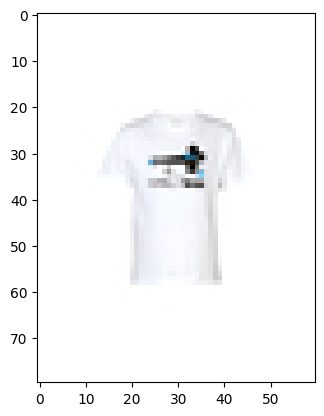

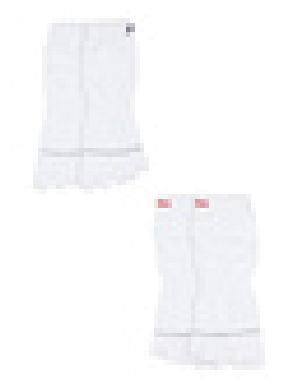

Product Index: 6248
Encoded Subcategory: 5, Gender: 4, Colour: 36
Subcategory: Jewellery
Some complementary subcategories could not be found.
Recommended items: [11591, 53742, 52904, 19298]
Main item:


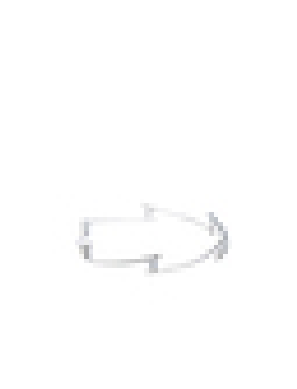

Recommended items:


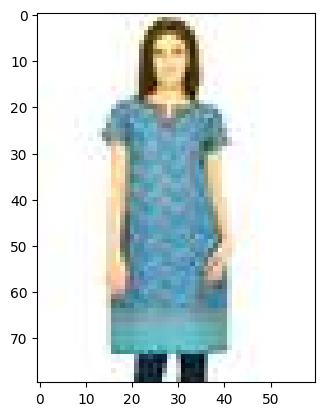

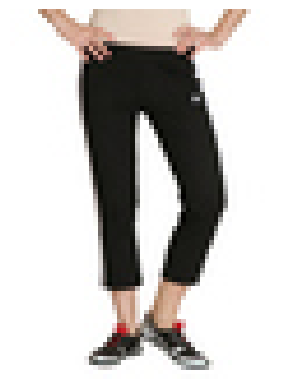

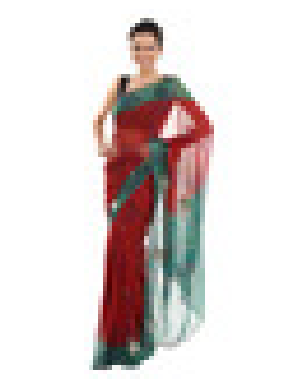

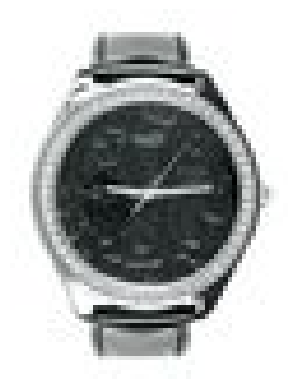

Product Index: 14184
Encoded Subcategory: 10, Gender: 4, Colour: 0
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended items: [37640, 44667, 52860, 45406, 42913, 37646, 19264]
Main item:


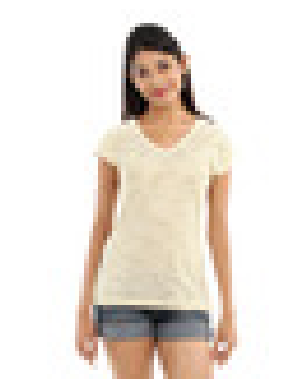

Recommended items:


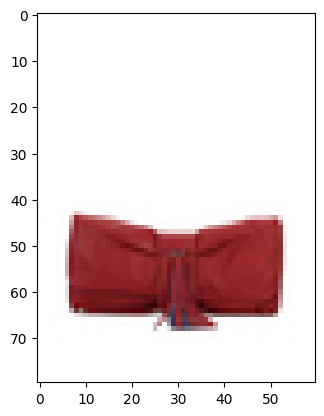

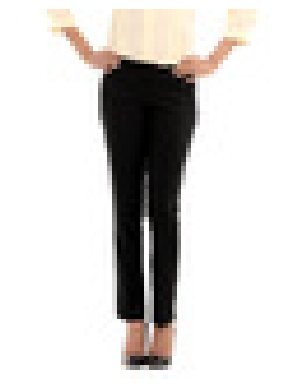

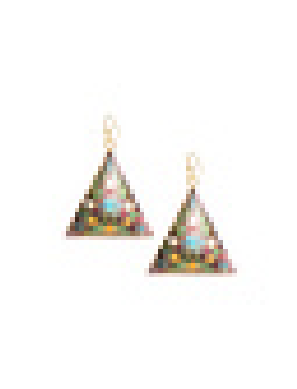

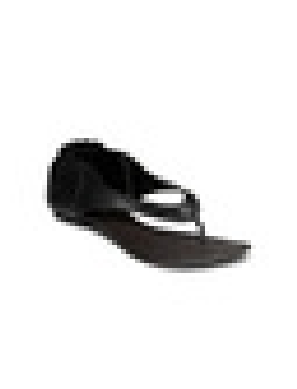

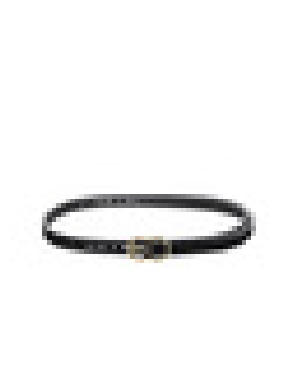

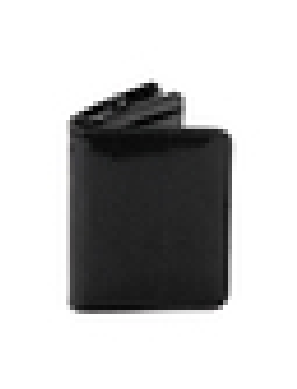

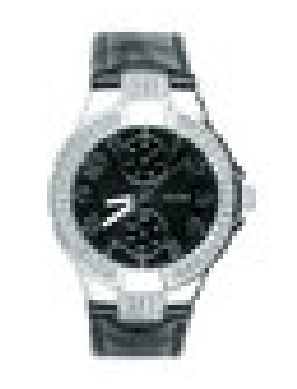

Product Index: 24698
Encoded Subcategory: 10, Gender: 4, Colour: 42
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended items: [34880, 48570, 26988, 45406, 50218, 33622, 19264]
Main item:


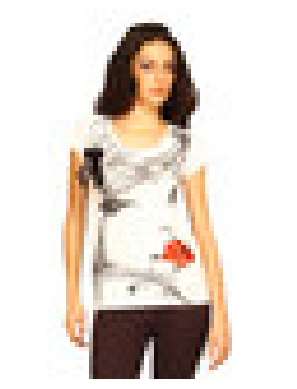

Recommended items:


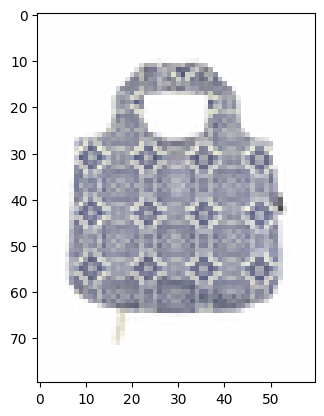

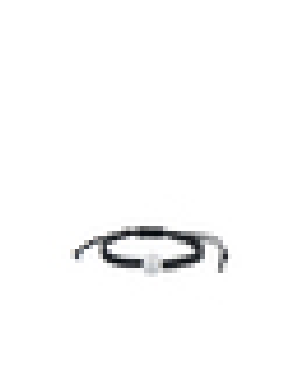

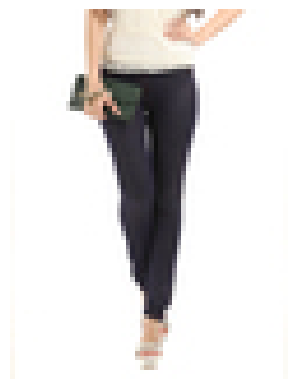

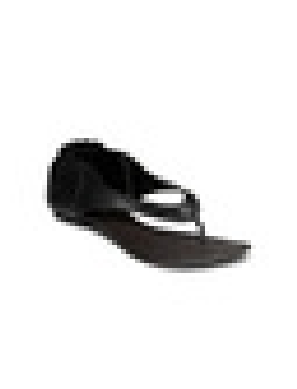

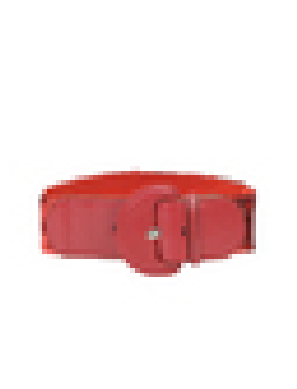

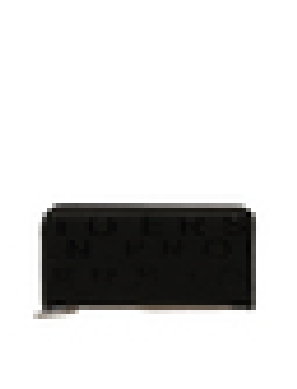

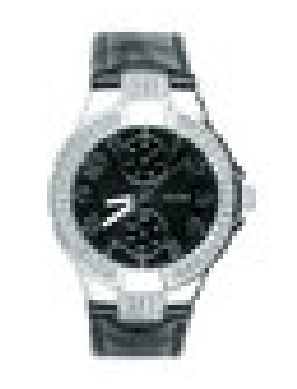

Product Index: 434
Encoded Subcategory: 2, Gender: 4, Colour: 25
Subcategory: Bottomwear
Some complementary subcategories could not be found.
Recommended items: [45958, 53447, 58195, 33739, 58236, 19292]
Main item:


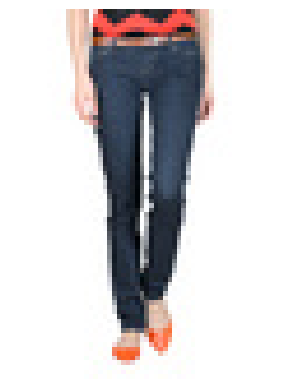

Recommended items:


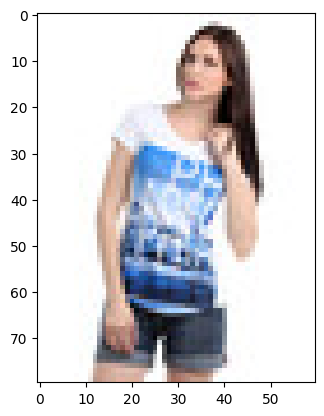

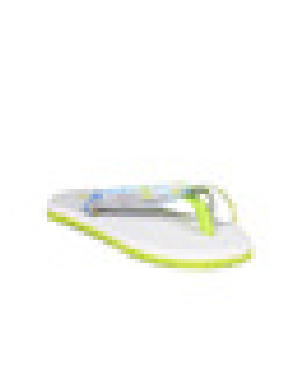

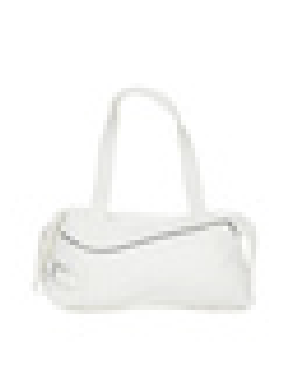

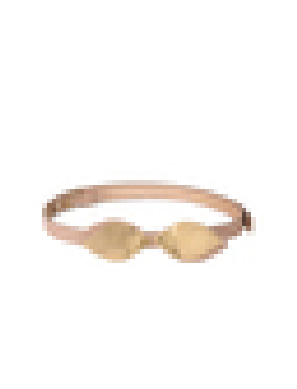

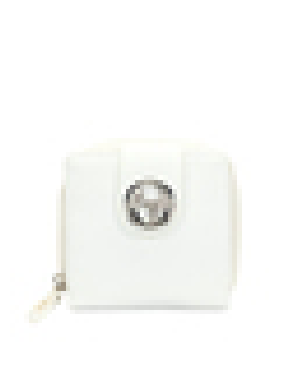

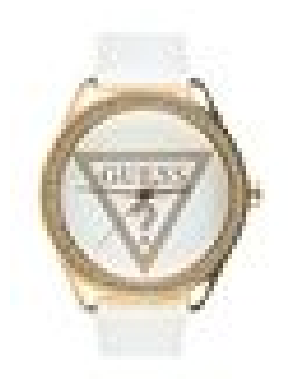

Product Index: 16926
Encoded Subcategory: 10, Gender: 4, Colour: 1
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended items: [26982, 48859, 53447, 58279, 42926, 36527, 19292]
Main item:


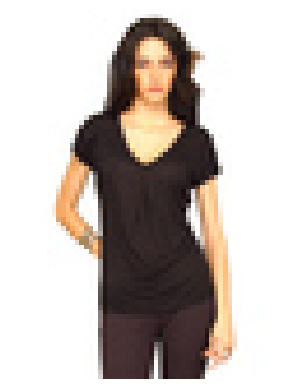

Recommended items:


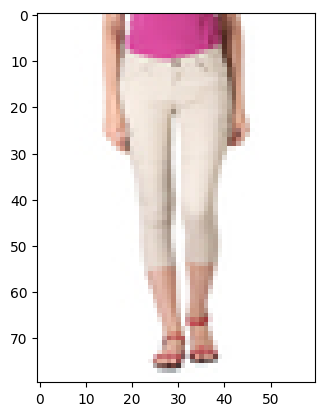

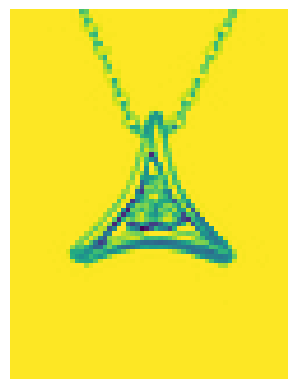

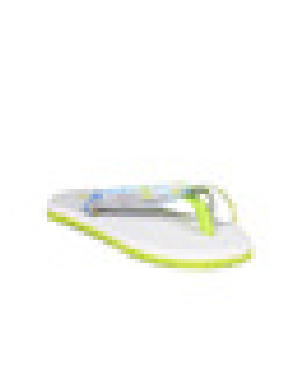

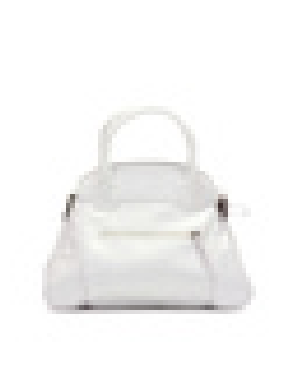

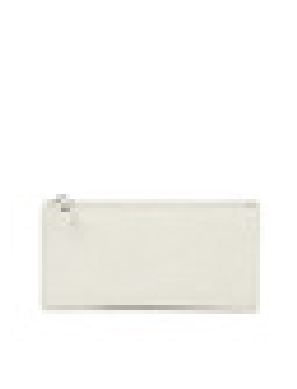

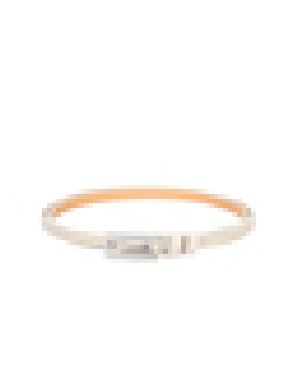

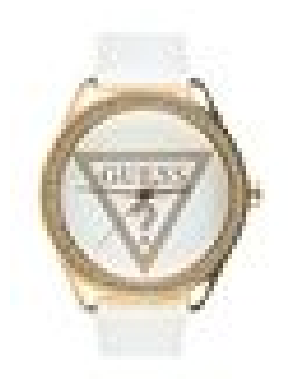

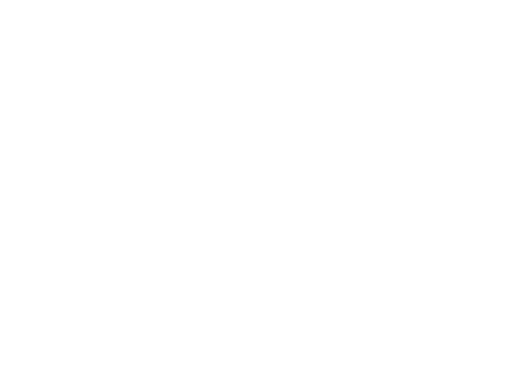

In [ ]:
# Example usage:
for i in random_product_ids:
  item_id = i[1]
  recommendations = get_recommendations(item_id,processed_dataset,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
  print("Recommended items:", recommendations)
  path_images_1 = []
  image_url = "/content/drive/MyDrive/images/"
  for j in recommendations:
    if j is not None:
      path_images_1.append(image_url + df[df.id==j]['filename'].values[0])
  path_images_1
  image_path_1 = f"/content/drive/MyDrive/images/{item_id}.jpg"

  pil_image_1 = Image.open(image_path_1)
  resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

  print("Main item:")
  plt.imshow(resized_image_1)
  plt.axis("off")
  plt.show()

  print("Recommended items:")
  rec_images_1 = []
  for i in path_images_1:
      pil_image = Image.open(i)
      image_array = np.array(pil_image)
      resized_image = cv2.resize(image_array, IMAGE_SIZE)
      rec_images_1.append(resized_image)

  for i in rec_images_1:
      plt.imshow(i)
      plt.show()
      plt.axis("off")

# **Collaborative Filtering**

In [ ]:
df.reset_index(drop=True, inplace=True)
processed_dataset.reset_index(drop=True, inplace=True)

processed_dataset['user_id'] = df['user_id']
processed_dataset

id  gender  masterCategory  subCategory  articleType  baseColour  \
0      30757       2               1           10           23          13   
1      14881       4               0            0           17           1   
2      48449       2               1           10           62           2   
3      12868       2               2            8           16           1   
4      17968       2               2            4           15           1   
...      ...     ...             ...          ...          ...         ...   
28543  54078       2               2            8           48          29   
28544  13183       2               2            8           48          42   
28545  10264       2               2            8           16           1   
28546  45378       4               2            8           14           1   
28547   5864       3               2            8            7          25   

       season  usage                                 productDisplayName  \
0           2      1                 Fabindia Men Grey Mangalgiri Kurta   
1           2      0  United Colors of Benetton Women Solid Black Ha...   
2           2      0                 French Connection Men Blue T-shirt   
3           1      2                  Lee Cooper Men Formal Black Shoes   
4           0      0                      Puma Men Splash Black Slipper   
...       ...    ...                                                ...   
28543       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
28544       0      5                 Fila Men Dls 96 White Sports Shoes   
28545       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
28546       2      0                          Rocia Women Black Sandals   
28547       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

       Month  cluster   ratings  Price (USD)      year  \
0         11        1  0.315497    -0.423862  0.745031   
1         10        1 -0.465599     0.459915 -0.890805   
2          1        0  1.096594     0.459915  0.745031   
3          1        2 -0.465599    -0.865751  0.745031   
4          5        0  0.315497     1.432070 -0.890805   
...      ...      ...       ...          ...       ...   
28543     11        0  1.096594     0.636671  0.745031   
28544      4        0  1.096594     1.697203 -0.890805   
28545      9        1  1.096594     0.813426  2.380867   
28546      9        1  1.096594     1.255315  0.745031   
28547      3        2 -1.246695    -1.837905 -0.890805   

                                       combined_features  user_id  
0      2 13 1 10 23 0.7450307834999575 11 0.315497493...    24592  
1      4 1 0 0 17 -0.8908051499991239 10 -0.465598893...    13278  
2      2 2 1 10 62 0.7450307834999575 1 1.09659387940...    46048  
3      2 1 2 8 16 0.7450307834999575 1 -0.46559889333...    28289  
4      2 1 2 4 15 -0.8908051499991239 5 0.31549749303...    23434  
...                                                  ...      ...  
28543  2 29 2 8 48 0.7450307834999575 11 1.0965938794...    73318  
28544  2 42 2 8 48 -0.8908051499991239 4 1.0965938794...    18851  
28545  2 1 2 8 16 2.380866716999039 9 1.0965938794050...    55457  
28546  4 1 2 8 14 0.7450307834999575 9 1.096593879405...    40311  
28547  3 25 2 8 7 -0.8908051499991239 3 -1.2466952796...    85631  

[28548 rows x 16 columns]

In [ ]:
from scipy.sparse import csr_matrix
import pandas as pd

# Assuming processed_dataset is a Pandas DataFrame with columns: 'user_id', 'id', 'ratings'

# Step 1: Create unique mappings for users and items
unique_users = processed_dataset['user_id'].unique()
unique_items = processed_dataset['id'].unique()

# Map user_id and item_id to indices
user_mapping = {user_id: idx for idx, user_id in enumerate(unique_users)}
item_mapping = {item_id: idx for idx, item_id in enumerate(unique_items)}

# Add user and item index mappings to the dataset
processed_dataset['user_index'] = processed_dataset['user_id'].map(user_mapping)
processed_dataset['item_index'] = processed_dataset['id'].map(item_mapping)

# Step 2: Create the interaction matrix
row = processed_dataset['user_index'].values
col = processed_dataset['item_index'].values
data = processed_dataset['ratings'].values  # Ratings as interaction values

# Use scipy.sparse.csr_matrix for efficient storage of sparse matrices
interaction_matrix = csr_matrix((data, (row, col)), shape=(len(unique_users), len(unique_items)))

print(f"User-item interaction matrix created with shape: {interaction_matrix.shape}")

interaction_matrix_dense = interaction_matrix.toarray()
print("Converted interaction matrix to dense format.")


User-item interaction matrix created with shape: (4890, 28548)
Converted interaction matrix to dense format.


In [ ]:
interaction_matrix

<4890x28548 sparse matrix of type '<class 'numpy.float64'>'
	with 28548 stored elements in Compressed Sparse Row format>

In [ ]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808331 sha256=8b1e71243e33fe3150354a14ae588c358077013dcdb164503cf2dfaa56d98269
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
from lightfm import LightFM
pmf_model = LightFM(loss='warp')
pmf_model.fit(interaction_matrix, epochs=10, num_threads=4)

In [ ]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Flip Flops','Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {10: [2, 4, 8, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 2, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 4, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}
Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: 

In [ ]:
processed_dataset.user_id.sample(5)

3517     51015
24782    73092
26179    23474
11945    81509
655      78386
Name: user_id, dtype: int64

In [ ]:
def get_recommendations_pmf(user_id, product_id, df_encoded, pmf_model, user_mapping, item_mapping, encoded_complementary_map, encoded_complementary_colour_map):
    # Check if the user and product exist in the mappings
    user_internal_id = user_mapping.get(user_id)
    product_internal_id = item_mapping.get(product_id)

    if user_internal_id is None:
        print(f"User ID {user_id} not found in user mapping.")
        return []
    if product_internal_id is None:
        print(f"Product ID {product_id} not found in item mapping.")
        return []

    # Retrieve the target product attributes for filtering
    try:
        product_row = df_encoded[df_encoded['id'] == product_id].iloc[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset.")
        return []

    # Extract target product attributes
    encoded_subcategory = product_row['subCategory']
    product_gender = product_row['gender']
    encoded_colour = product_row['baseColour']
    # product_usage = product_row['usage']  # Assuming "usage" column represents casual/formal/etc.
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")

    # Calculate user-specific scores for all items
    user_embedding = pmf_model.user_embeddings[user_internal_id]
    scores = user_embedding @ pmf_model.item_embeddings.T

    # Sort items by user-specific scores, excluding the target product itself
    similar_indices = scores.argsort()[::-1]
    similar_indices = [idx for idx in similar_indices if idx != product_internal_id]  # Exclude target product

    recommendations = []
    recommended_subcategories = set()
    best_footwear = None
    best_footwear_score = -float('inf')  # Initialize with a very low score

    # Loop through the sorted items
    for index in similar_indices:
        recommended_product = df_encoded.iloc[index]
        recommended_subcategory = recommended_product['subCategory']
        recommended_colour = recommended_product['baseColour']
        recommended_gender = recommended_product['gender']
        recommended_master_category = recommended_product['masterCategory']
        recommended_usage = recommended_product['usage']
        similarity_score = scores[index]

        # Check for complementary subcategories and colors
        complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
        complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])

        # Check for matching criteria: complementary, same gender, same usage, unique subcategory
        if (recommended_subcategory in complementary_subcategories and
            recommended_gender == product_gender and
            recommended_colour in complementary_colours and  # Ensure same usage
            recommended_subcategory not in recommended_subcategories):

            # Select best footwear based on the highest similarity score
            if recommended_master_category == 2:  # Assuming "2" is the master category ID for footwear
                if similarity_score > best_footwear_score:
                    best_footwear = recommended_product
                    best_footwear_score = similarity_score
            else:
                # Add other matching items to recommendations
                recommendations.append(recommended_product['id'])
                recommended_subcategories.add(recommended_subcategory)

            # Stop if we have enough unique recommendations
            if len(recommended_subcategories) >= 4:
                break

    # Add the best footwear item, if any
    if best_footwear is not None:
        recommendations.append(best_footwear['id'])

    if not recommendations:
        print("No recommendations found.")
    if len(recommendations) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommendations


In [ ]:
gender_mapping

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}

In [ ]:
processed_dataset[['id','user_id']].sample(5)

id  user_id
19893   1729    29808
17430  58189    25435
10204  51508    95599
5919   18835    26274
12320  30878    83526

In [ ]:
decode_mapping

{0: 'Bags',
 1: 'Belts',
 2: 'Bottomwear',
 3: 'Eyewear',
 4: 'Flip Flops',
 5: 'Jewellery',
 6: 'Loungewear and Nightwear',
 7: 'Saree',
 8: 'Shoes',
 9: 'Socks',
 10: 'Topwear',
 11: 'Wallets',
 12: 'Watches'}

In [ ]:
processed_dataset[processed_dataset.id == 3993]

id  gender  masterCategory  subCategory  articleType  baseColour  \
26241  3993       2               0            1           62          31   

       season  usage                     productDisplayName  Month  cluster  \
26241       2      0  Mr.Men Men's Funny Coral Pink T-shirt      0        1   

        ratings  Price (USD)      year  \
26241  1.096594    -0.158729 -0.890805   

                                       combined_features  user_id  user_index  \
26241  2 31 0 1 62 -0.8908051499991239 0 1.0965938794...    37110        1387   

       item_index  
26241       26241

In [ ]:
item_id = 59924
user_id = 18142
recommended_items = get_recommendations_pmf(user_id, item_id, processed_dataset, pmf_model, user_mapping, item_mapping, encoded_complementary_map, encoded_complementary_colour_map)
print("Recommended items:", recommended_items)

Encoded Subcategory: 10, Gender: 4, Colour: 32
Some complementary subcategories could not be found.
Recommended items: [30820, 48757, 38476, 9922, 7728]


In [ ]:
# # Example usage:
# item_id = 41445
# recommended_items = get_recommendations_pmf(item_id, processed_dataset, pmf_model, user_mapping, item_mapping, encoded_complementary_map, encoded_complementary_colour_map)
# print("Recommended items:", recommended_items)

In [ ]:
path_images_1 = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_items:
  path_images_1.append(image_url + df[df.id==i]['filename'].values[0])
path_images_1

['//content//drive//MyDrive//images//30820.jpg',
 '//content//drive//MyDrive//images//48757.jpg',
 '//content//drive//MyDrive//images//38476.jpg',
 '//content//drive//MyDrive//images//9922.jpg',
 '//content//drive//MyDrive//images//7728.jpg']

In [ ]:
image_path_1 = f"//content//drive//MyDrive//images//{item_id}.jpg"

pil_image_1 = Image.open(image_path_1)
resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
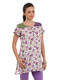

In [ ]:
resized_image_1

In [ ]:
rec_images_1 = []
for i in path_images_1:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images_1.append(resized_image)

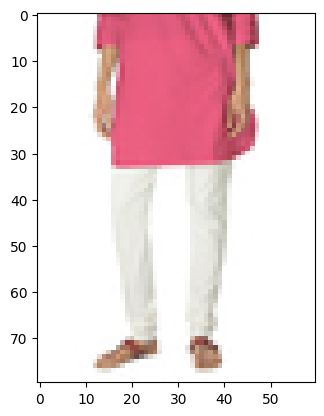

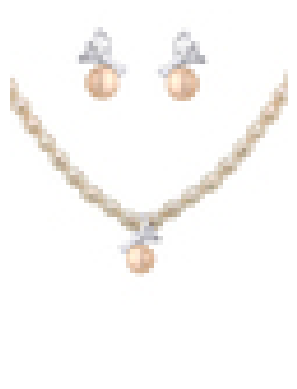

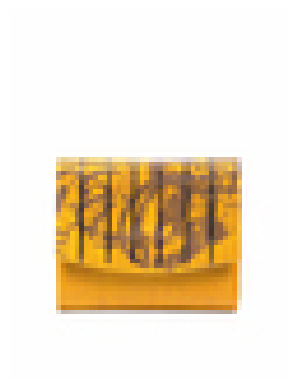

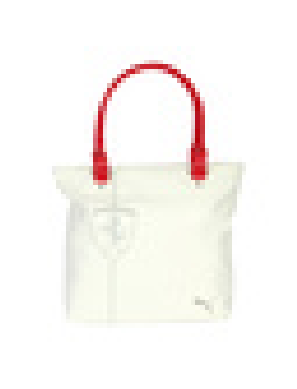

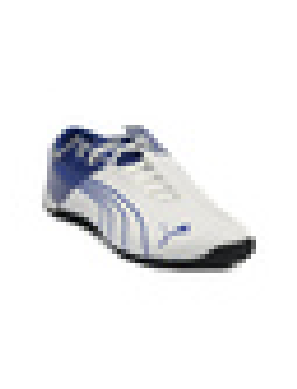

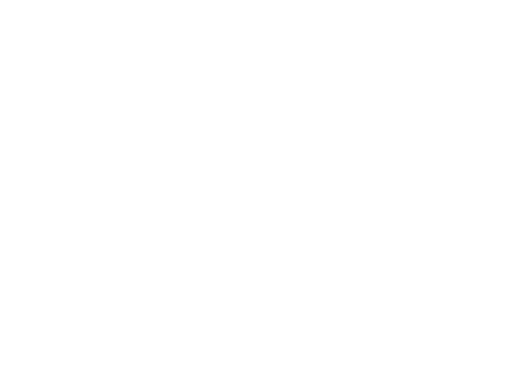

In [ ]:
for i in rec_images_1:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [ ]:
processed_dataset[['user_id','id']].sample(10)

user_id     id
13808    57843   2143
10922    75873   7431
17125    68446   4163
22476    54939  17710
27231    95215   9437
23314    12559   3664
7262     59710  25856
6398     80329   4093
5694     40508  52647
19478    52291  20113

In [ ]:
random_product_ids = [(95426, 54872),(29613, 33250),(41608, 8190), (63368, 14978), (69682, 8249), (11581, 48748), (34232, 44689), (89807, 3947), (63225, 40371), (46655, 3969)]

Encoded Subcategory: 5, Gender: 4, Colour: 41
Some complementary subcategories could not be found.
Recommended items: [15077, 12839, 52920, 19264]
Main item:


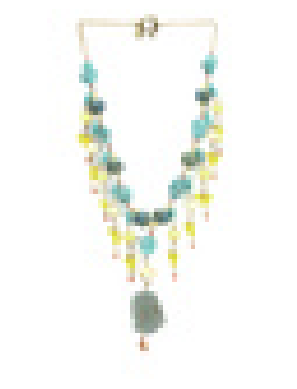

Recommended items:


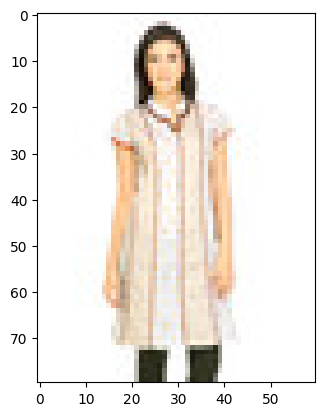

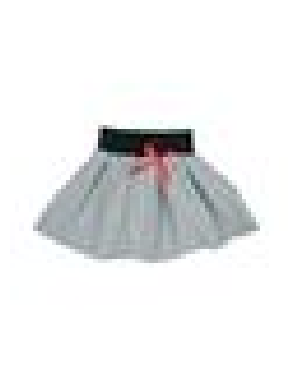

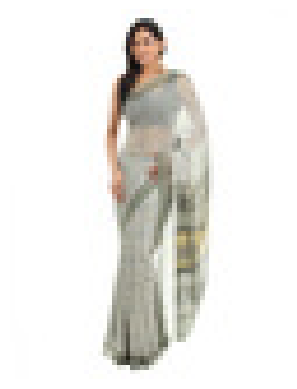

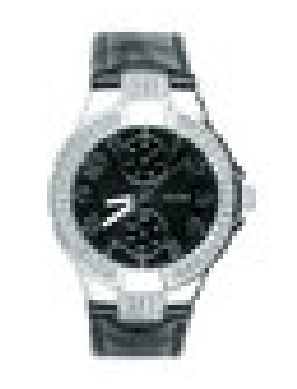

Encoded Subcategory: 10, Gender: 2, Colour: 42
Some complementary subcategories could not be found.
Recommended items: [44912, 11124, 36118, 36023, 38653]
Main item:


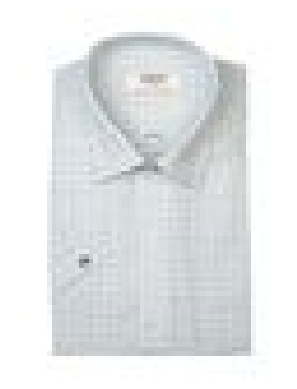

Recommended items:


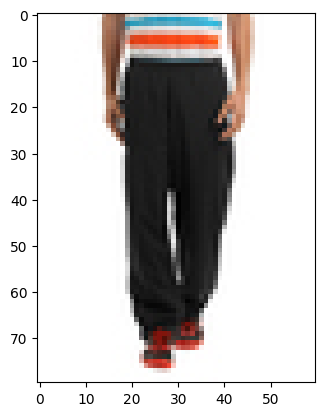

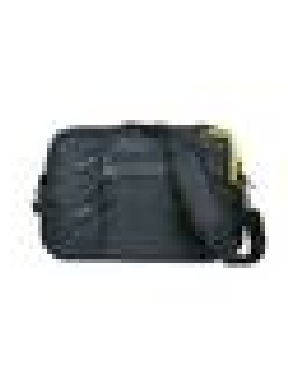

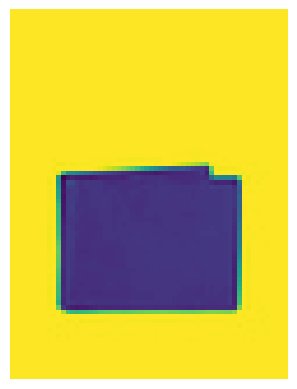

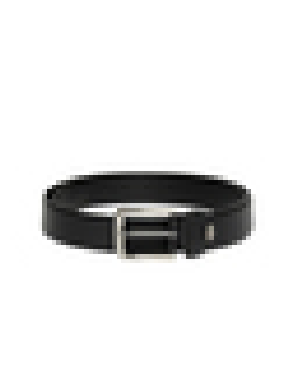

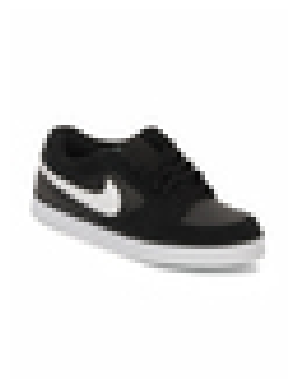

Encoded Subcategory: 10, Gender: 2, Colour: 1
Some complementary subcategories could not be found.
Recommended items: [23038, 8922, 44601, 40763, 26641]
Main item:


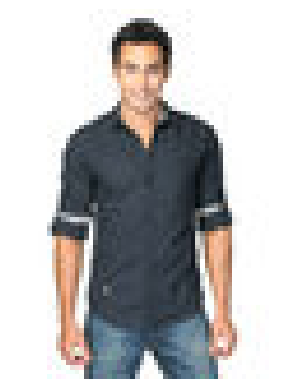

Recommended items:


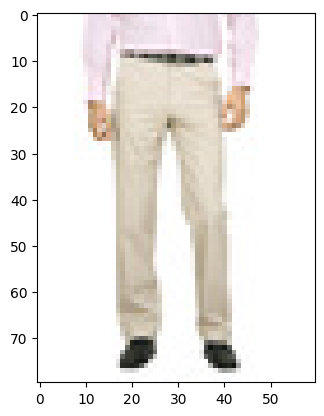

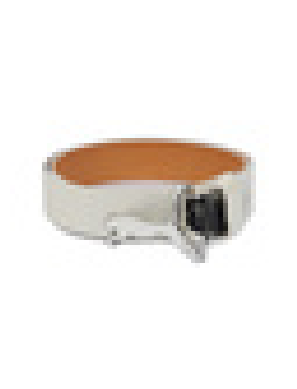

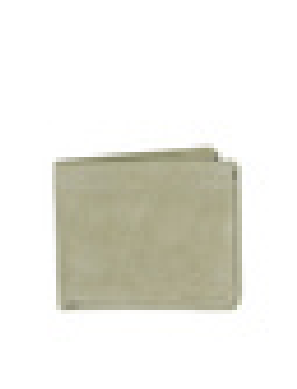

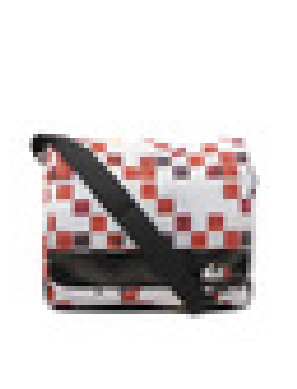

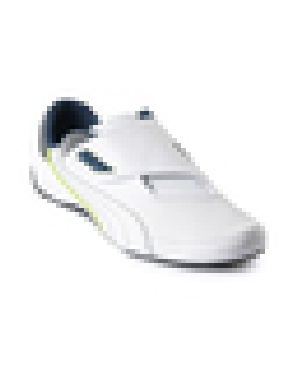

Encoded Subcategory: 1, Gender: 2, Colour: 1
Some complementary subcategories could not be found.
Recommended items: [3858, 15119, 5474]
Main item:


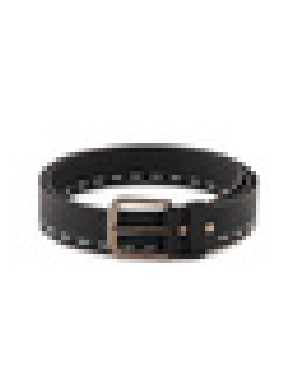

Recommended items:


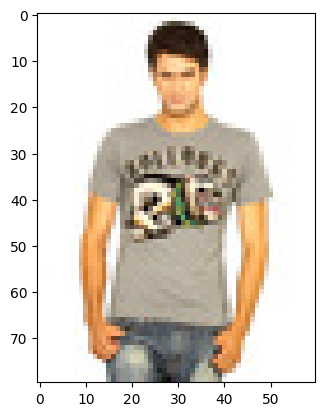

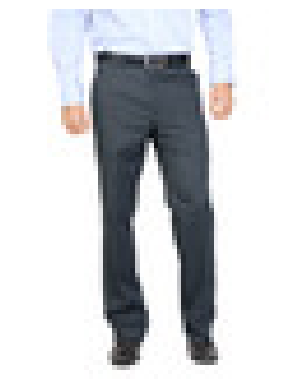

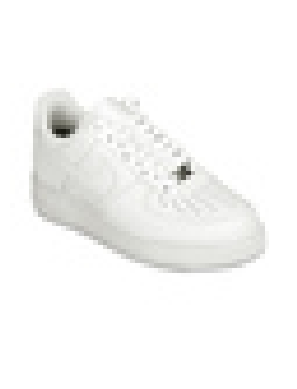

Encoded Subcategory: 8, Gender: 3, Colour: 1
Some complementary subcategories could not be found.
Recommended items: [8505, 12597]
Main item:


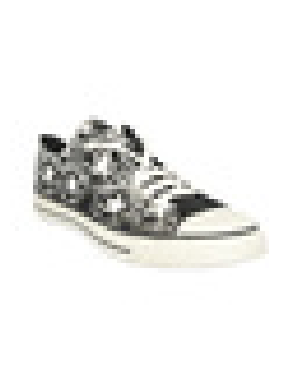

Recommended items:


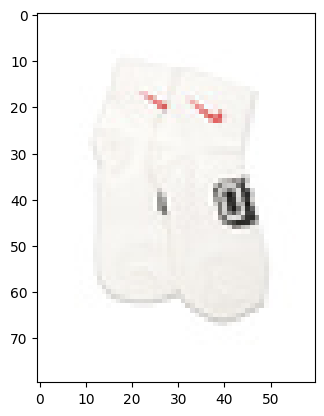

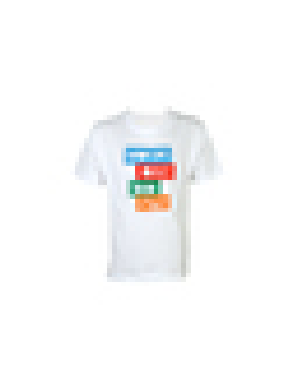

Encoded Subcategory: 5, Gender: 4, Colour: 36
Some complementary subcategories could not be found.
Recommended items: [8468, 30616, 46007, 19298]
Main item:


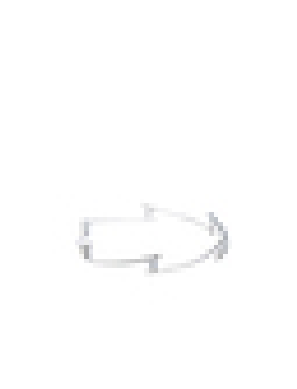

Recommended items:


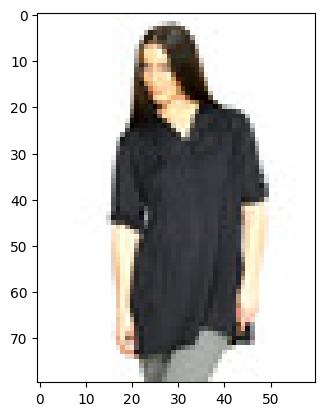

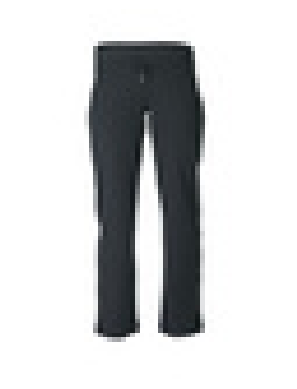

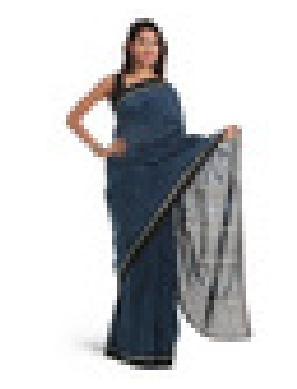

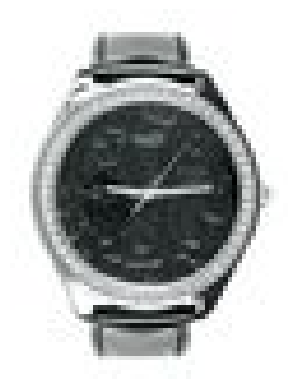

Encoded Subcategory: 10, Gender: 4, Colour: 0
Some complementary subcategories could not be found.
Recommended items: [33622, 42871, 47076, 19298, 45784]
Main item:


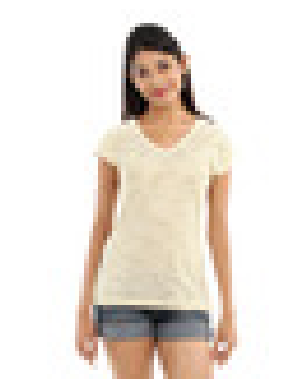

Recommended items:


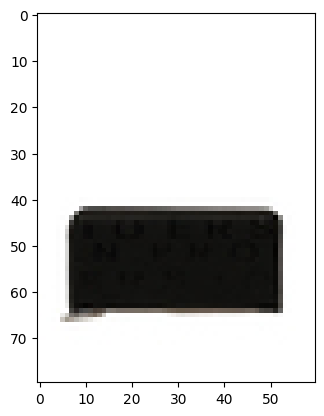

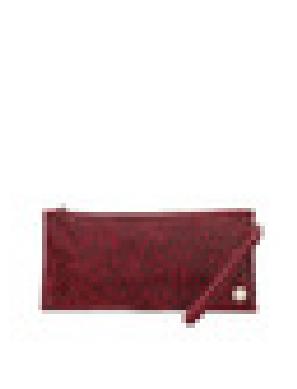

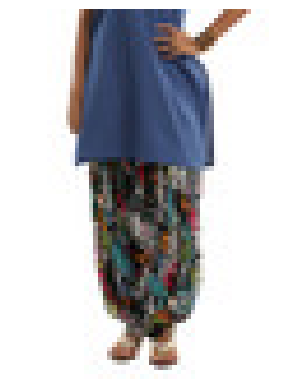

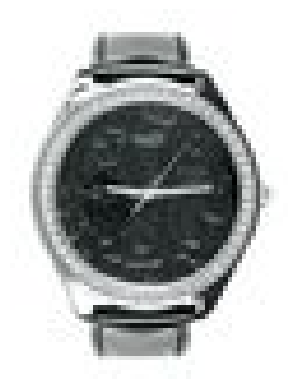

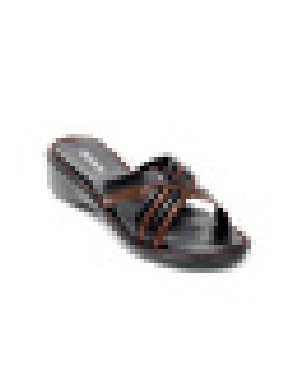

Encoded Subcategory: 10, Gender: 4, Colour: 42
Some complementary subcategories could not be found.
Recommended items: [51582, 38440, 50220, 52176, 56405]
Main item:


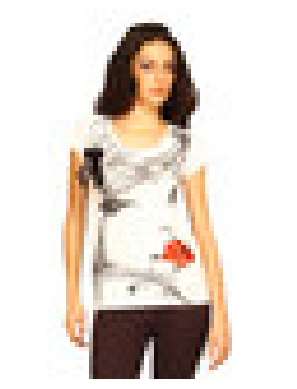

Recommended items:


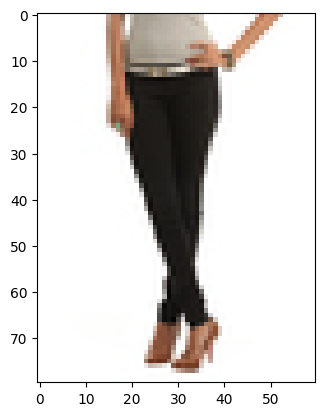

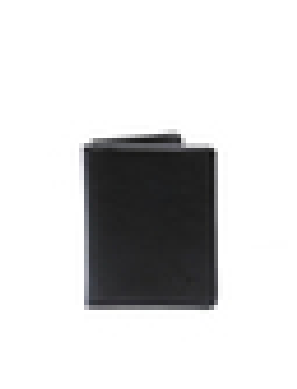

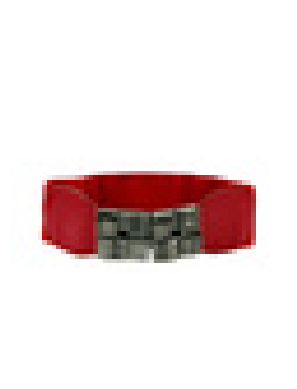

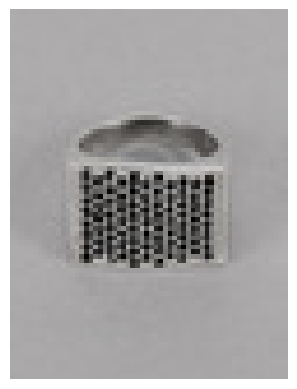

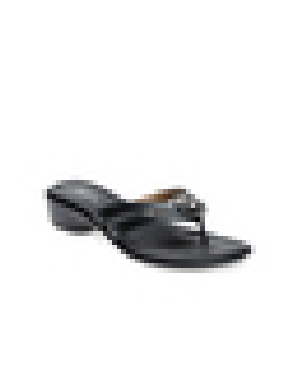

Encoded Subcategory: 2, Gender: 4, Colour: 25
Some complementary subcategories could not be found.
Recommended items: [34067, 54000, 38476, 38410, 3618]
Main item:


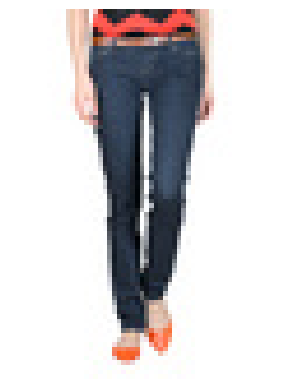

Recommended items:


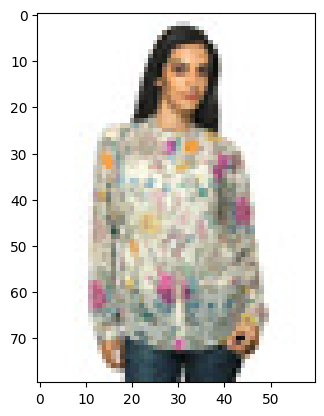

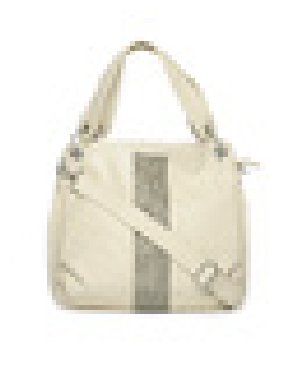

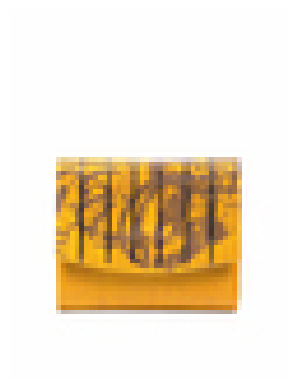

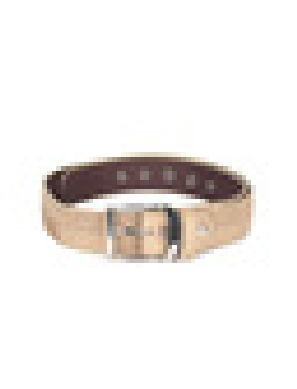

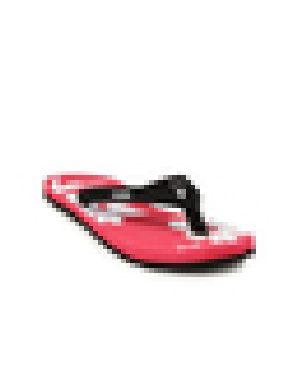

Encoded Subcategory: 10, Gender: 4, Colour: 1
Some complementary subcategories could not be found.
Recommended items: [52569, 48857, 38485, 26982, 4511]
Main item:


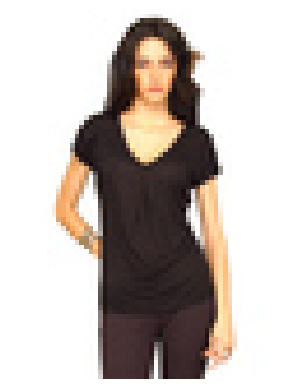

Recommended items:


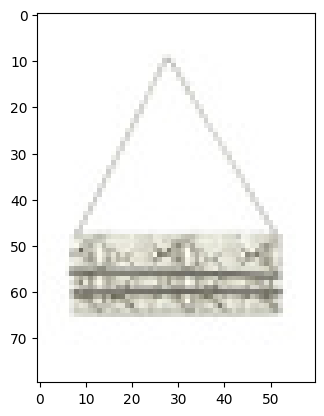

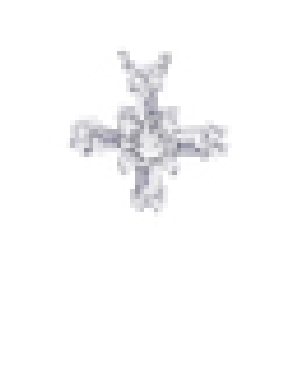

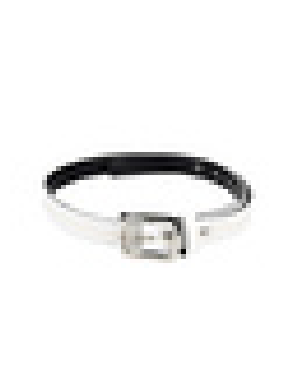

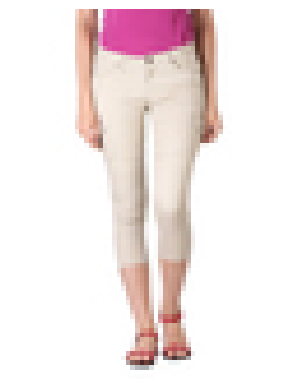

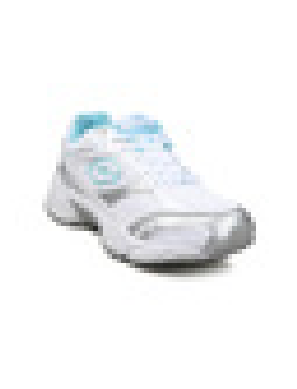

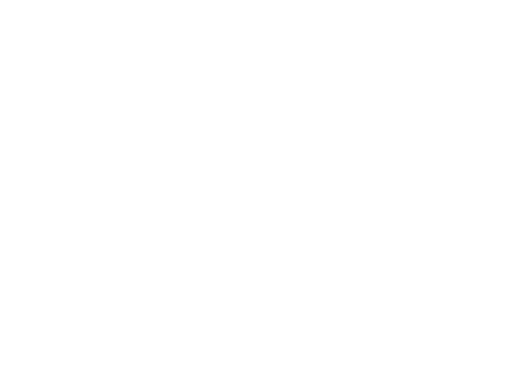

In [ ]:
# Example usage:
for i in random_product_ids:
  item_id = i[1]
  user_id = i[0]
  recommended_items = get_recommendations_pmf(user_id,item_id, processed_dataset, pmf_model, user_mapping, item_mapping, encoded_complementary_map, encoded_complementary_colour_map)
  print("Recommended items:", recommended_items)
  path_images_1 = []
  image_url = "//content//drive//MyDrive//images//"
  for i in recommended_items:
    path_images_1.append(image_url + df[df.id==i]['filename'].values[0])
  path_images_1
  image_path_1 = f"//content//drive//MyDrive//images//{item_id}.jpg"

  pil_image_1 = Image.open(image_path_1)
  resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

  print("Main item:")
  plt.imshow(resized_image_1)
  plt.axis("off")
  plt.show()

  print("Recommended items:")
  rec_images_1 = []
  for i in path_images_1:
      pil_image = Image.open(i)
      image_array = np.array(pil_image)
      resized_image = cv2.resize(image_array, IMAGE_SIZE)
      rec_images_1.append(resized_image)

  for i in rec_images_1:
      plt.imshow(i)
      plt.show()
      plt.axis("off")

In [ ]:
df[df.id == 23038]

user_id     id gender masterCategory subCategory articleType  \
12245    87846  23038    Men        Apparel  Bottomwear    Trousers   

      baseColour  season    year   usage  ... cluster gender_encoded  \
12245      Beige  Summer  2011.0  Casual  ...       2              2   

      season_encoded  usage_encoded masterCategory_encoded  \
12245              2              0                      1   

      subCategory_encoded  articleType_encoded  baseColour_encoded  \
12245                   2                   61                   0   

       user_index  item_index  
12245        4612       12245  

[1 rows x 27 columns]

In [ ]:
df[df.id == 3993]

user_id    id gender masterCategory subCategory articleType baseColour  \
26241    37110  3993    Men    Accessories       Belts     Tshirts       Pink   

       season    year   usage  ... cluster gender_encoded season_encoded  \
26241  Summer  2011.0  Casual  ...       1              2              2   

       usage_encoded masterCategory_encoded subCategory_encoded  \
26241              0                      0                   1   

       articleType_encoded  baseColour_encoded  user_index  item_index  
26241                   62                  31        1387       26241  

[1 rows x 27 columns]

# **Hybrid DNN Model**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28548 entries, 0 to 28547
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 28548 non-null  int64  
 1   id                      28548 non-null  int64  
 2   gender                  28548 non-null  object 
 3   masterCategory          28548 non-null  object 
 4   subCategory             28548 non-null  object 
 5   articleType             28548 non-null  object 
 6   baseColour              28548 non-null  object 
 7   season                  28548 non-null  object 
 8   year                    28548 non-null  float64
 9   usage                   28548 non-null  object 
 10  productDisplayName      28548 non-null  object 
 11  filename                28548 non-null  object 
 12  link                    28548 non-null  object 
 13  ratings                 28548 non-null  int64  
 14  review                  28548 non-null

In [ ]:
df.shape


(28548, 27)

In [ ]:
# Encode categorical columns
label_encoders = {}
for column in ['gender', 'season', 'usage', 'masterCategory', 'subCategory', 'articleType', 'baseColour']:
      le = LabelEncoder()
      df[column + '_encoded'] = le.fit_transform(df[column].astype(str))
      label_encoders[column] = le


In [ ]:
df.head()


user_id     id gender masterCategory subCategory   articleType baseColour  \
0    24592  30757    Men        Apparel     Topwear        Kurtas       Grey   
1    13278  14881  Women    Accessories        Bags      Handbags      Black   
2    46048  48449    Men        Apparel     Topwear       Tshirts       Blue   
3    28289  12868    Men       Footwear       Shoes  Formal Shoes      Black   
4    23434  17968    Men       Footwear  Flip Flops    Flip Flops      Black   

   season    year   usage  ... cluster gender_encoded season_encoded  \
0  Summer  2012.0  Ethnic  ...       1              2              2   
1  Summer  2011.0  Casual  ...       1              4              2   
2  Summer  2012.0  Casual  ...       0              2              2   
3  Spring  2012.0  Formal  ...       2              2              1   
4    Fall  2011.0  Casual  ...       0              2              0   

   usage_encoded masterCategory_encoded subCategory_encoded  \
0              1                      1                  10   
1              0                      0                   0   
2              0                      1                  10   
3              2                      2                   8   
4              0                      2                   4   

   articleType_encoded  baseColour_encoded  user_index  item_index  
0                   23                  13           0           0  
1                   17                   1           1           1  
2                   62                   2           2           2  
3                   16                   1           3           3  
4                   15                   1           4           4  

[5 rows x 27 columns]

In [ ]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear','Bottomwear','Shoes'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes','Loungewear and Nightwear','Topwear','Bottomwear']
}

In [ ]:
num_masterCategory = len(df['masterCategory'].unique())
num_subCategory = len(df['subCategory'].unique())
num_articleType = len(df['articleType'].unique())
num_gender = len(df['gender'].unique())
num_baseColour = len(df['baseColour'].unique())
num_season = len(df['season'].unique())
num_usage = len(df['usage'].unique())

In [ ]:
from scipy.sparse import csr_matrix

user_mapping = {}  # Mapping user IDs to indices
item_mapping = {}  # Mapping item IDs to indices

# Create unique mappings for all users and items in the dataset
unique_users = df['user_id'].unique()
unique_items = df['id'].unique()

# Map user_id and item_id to matrix indices
user_mapping = {user_id: idx for idx, user_id in enumerate(unique_users)}
item_mapping = {item_id: idx for idx, item_id in enumerate(unique_items)}

# Add user and item index mappings to the dataset
df['user_index'] = df['user_id'].map(user_mapping)
df['item_index'] = df['id'].map(item_mapping)

# Create the interaction matrix using ratings as interaction values
row = df['user_index'].values
col = df['item_index'].values
data = df['ratings'].values  # Using ratings as the interaction values

interaction_matrix = csr_matrix((data, (row, col)), shape=(len(unique_users), len(unique_items)))

print("User-item interaction matrix created for the entire dataset.")


User-item interaction matrix created for the entire dataset.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dot

def create_hybrid_model(num_users, num_items, num_categories, num_gender, num_colors, num_seasons, num_usage, embedding_dim=32):
    """
    Create a hybrid recommendation model using user-item embeddings and content-based feature embeddings.
    """

    # Collaborative Filtering: User and Item Embeddings
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

    # Flatten embeddings
    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    # Collaborative interaction (e.g., dot product or concatenation)
    collaborative_interaction = Dot(axes=1)([user_flat, item_flat])

    # Content-Based Filtering: Feature Embeddings
    input_masterCategory = Input(shape=(1,), name='masterCategory')
    input_subCategory = Input(shape=(1,), name='subCategory')
    input_articleType = Input(shape=(1,), name='articleType')
    input_gender = Input(shape=(1,), name='gender')
    input_baseColour = Input(shape=(1,), name='baseColour')
    input_season = Input(shape=(1,), name='season')
    input_usage = Input(shape=(1,), name='usage')
    input_price = Input(shape=(1,), name='Price (USD)')

    masterCategory_embedding = Embedding(input_dim=num_masterCategory + 1, output_dim=embedding_dim)(input_masterCategory)
    subCategory_embedding = Embedding(input_dim=num_subCategory + 1, output_dim=embedding_dim)(input_subCategory)
    articleType_embedding = Embedding(input_dim=num_articleType + 1, output_dim=embedding_dim)(input_articleType)
    gender_embedding = Embedding(input_dim=num_gender + 1, output_dim=4)(input_gender)
    baseColour_embedding = Embedding(input_dim=num_baseColour + 1, output_dim=45)(input_baseColour)
    season_embedding = Embedding(input_dim=num_season + 1, output_dim=4)(input_season)
    usage_embedding = Embedding(input_dim=num_usage + 1, output_dim=7)(input_usage)

    # Flatten embeddings
    masterCategory_flat = Flatten()(masterCategory_embedding)
    subCategory_flat = Flatten()(subCategory_embedding)
    articleType_flat = Flatten()(articleType_embedding)
    gender_flat = Flatten()(gender_embedding)
    baseColour_flat = Flatten()(baseColour_embedding)
    season_flat = Flatten()(season_embedding)
    usage_flat = Flatten()(usage_embedding)

    # Concatenate all content-based features
    content_features = Concatenate()([masterCategory_flat, subCategory_flat, articleType_flat,
                            gender_flat, baseColour_flat, season_flat, usage_flat, input_price])

    # Hybrid Interaction: Combine Collaborative and Content-Based Features
    hybrid_features = Concatenate()([collaborative_interaction, user_flat, item_flat, content_features])

    # Dense Layers for Non-Linear Transformation
    dense1 = Dense(128, activation='relu')(hybrid_features)
    dense2 = Dense(64, activation='relu')(dense1)

    complementary_output = Dense(len(df['subCategory_encoded'].unique()), activation='sigmoid', name='complementary')(dense2)

    # Create Model
    model = Model(inputs=[
        user_input, item_input, input_masterCategory, input_subCategory, input_articleType, input_gender, input_baseColour, input_season, input_usage, input_price
    ], outputs=[complementary_output])

    return model

model = create_hybrid_model(
    num_users=len(df['user_id'].unique()),
    num_items=len(df['id'].unique()),
    num_categories=len(df['subCategory_encoded'].unique()),
    num_gender=len(df['gender_encoded'].unique()),
    num_colors=len(df['baseColour_encoded'].unique()),
    num_seasons=len(df['season_encoded'].unique()),
    num_usage=len(df['usage_encoded'].unique())
)

# Model Summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masterCategory            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subCategory (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ articleType (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ baseColour (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ season (InputLayer)       │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ usage (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 32)          │        156,480 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 32)          │        913,536 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 32)          │            128 │ masterCategory[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 1, 32)          │            448 │ subCategory[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 1, 32)          │          2,208 │ articleType[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_10 (Embedding)  │ (None, 1, 4)           │             24 │ gender[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_11 (Embedding)  │ (None, 1, 45)          │          2,025 │ baseColour[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_12 (Embedding)  │ (None, 1, 4)           │             20 │ season[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_13 (Embedding)  │ (None, 1, 7)           │             56 │ usage[0][0]            │
├──────────────────────

 Total params: 1,112,570 (4.24 MB)

 Trainable params: 1,112,570 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
df.head()


user_id     id gender masterCategory subCategory   articleType baseColour  \
0    24592  30757    Men        Apparel     Topwear        Kurtas       Grey   
1    13278  14881  Women    Accessories        Bags      Handbags      Black   
2    46048  48449    Men        Apparel     Topwear       Tshirts       Blue   
3    28289  12868    Men       Footwear       Shoes  Formal Shoes      Black   
4    23434  17968    Men       Footwear  Flip Flops    Flip Flops      Black   

   season    year   usage  ... cluster gender_encoded season_encoded  \
0  Summer  2012.0  Ethnic  ...       1              2              2   
1  Summer  2011.0  Casual  ...       1              4              2   
2  Summer  2012.0  Casual  ...       0              2              2   
3  Spring  2012.0  Formal  ...       2              2              1   
4    Fall  2011.0  Casual  ...       0              2              0   

   usage_encoded masterCategory_encoded subCategory_encoded  \
0              1                      1                  10   
1              0                      0                   0   
2              0                      1                  10   
3              2                      2                   8   
4              0                      2                   4   

   articleType_encoded  baseColour_encoded  user_index  item_index  
0                   23                  13           0           0  
1                   17                   1           1           1  
2                   62                   2           2           2  
3                   16                   1           3           3  
4                   15                   1           4           4  

[5 rows x 27 columns]

In [ ]:
# Generate training pairs and labels based on complementary relationships
def generate_training_pairs(df, complementary_map, label_encoders, num_subcategories): # Add num_subcategories as argument
    pairs = []
    labels = []

    for _, row in df.iterrows():
        main_subCategory = row['subCategory']
        main_subCategory_encoded = row['subCategory_encoded']

        if main_subCategory in complementary_map:
            for comp_subCategory in complementary_map[main_subCategory]:
                if comp_subCategory in label_encoders['subCategory'].classes_:
                    comp_subCategory_encoded = label_encoders['subCategory'].transform([comp_subCategory])[0]
                    pairs.append([row['user_index'], row['item_index'], row['masterCategory_encoded'], row['subCategory_encoded'],
                                  row['articleType_encoded'], row['gender_encoded'], row['baseColour_encoded'],
                                  row['season_encoded'], row['usage_encoded'], row['Price (USD)']])
                    label = np.zeros(num_subcategories) # Use num_subcategories instead of len(df['subCategory_encoded'].unique())
                    if comp_subCategory_encoded < num_subcategories: # Check if index is within bounds
                        label[comp_subCategory_encoded] = 1
                    labels.append(label)

    return np.array(pairs), np.array(labels)

In [ ]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df, df['subCategory_encoded'], test_size=0.2, random_state=42)


In [ ]:
# Generate training and testing pairs
num_subcategories = len(df['subCategory_encoded'].unique()) # Get total unique subcategories
X_train_pairs, y_train_labels = generate_training_pairs(X_train, complementary_map, label_encoders, num_subcategories)
X_test_pairs, y_test_labels = generate_training_pairs(X_test, complementary_map, label_encoders, num_subcategories)

X_train_pairs = X_train_pairs.astype('int32')
y_train_labels = y_train_labels.astype('float32')

X_test_pairs = X_test_pairs.astype('int32')
y_test_labels = y_test_labels.astype('float32')

In [ ]:
y_train_labels


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model.fit([X_train_pairs[:, 0], X_train_pairs[:, 1], X_train_pairs[:, 2], X_train_pairs[:, 3], X_train_pairs[:, 4],
           X_train_pairs[:, 5], X_train_pairs[:, 6], X_train_pairs[:, 7], X_train_pairs[:, 8], X_train_pairs[:, 9]],
          y_train_labels,epochs=10, batch_size=32)

Epoch 1/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.2411
Epoch 2/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.2204
Epoch 3/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2197
Epoch 4/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2194
Epoch 5/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2193
Epoch 6/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.2191
Epoch 7/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2190
Epoch 8/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2190
Epoch 9/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.2190
Epoch 10/10
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.2190


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model_at_k(model, test_df, complementary_map, label_encoders, k=5):
    """
    Evaluate the hybrid recommendation model using precision@k, recall@k, and f1-score@k.
    """
    precision_at_k = []
    recall_at_k = []
    f1_at_k = []

    # Iterate through each row in the test dataframe
    for _, row in test_df.iterrows():
        # Get the true subCategory and corresponding complementary categories
        true_subCategory = row['subCategory']
        true_complementary_categories = complementary_map.get(true_subCategory, [])
        true_complementary_indices = [
            label_encoders['subCategory'].transform([cat])[0]
            for cat in true_complementary_categories
            if cat in label_encoders['subCategory'].classes_
        ]

        # Prepare the input data for prediction (user, item, content-based features)
        user_input = np.array([row['user_index']])
        item_input = np.array([row['item_index']])

        input_masterCategory = np.array([row['masterCategory_encoded']])
        input_subCategory = np.array([row['subCategory_encoded']])
        input_articleType = np.array([row['articleType_encoded']])
        input_gender = np.array([row['gender_encoded']])
        input_baseColour = np.array([row['baseColour_encoded']])
        input_season = np.array([row['season_encoded']])
        input_usage = np.array([row['usage_encoded']])
        input_price = np.array([row['Price (USD)']])

        # Predict complementary categories using the model
        predictions = model.predict([
            user_input, item_input, input_masterCategory, input_subCategory,
            input_articleType, input_gender, input_baseColour, input_season,
            input_usage, input_price
        ])[0]
        print(predictions)

        # Get the top k predictions by sorting the probabilities in descending order
        top_k_indices = predictions.argsort()[::-1][:k]

        # Generate binary arrays for true and predicted categories at K
        y_true = np.zeros(len(predictions))
        y_pred = np.zeros(len(predictions))

        y_true[true_complementary_indices] = 1
        y_pred[top_k_indices] = 1

        # Calculate precision, recall, and F1 for this row
        precision = precision_score(y_true, y_pred, zero_division=1)
        recall = recall_score(y_true, y_pred, zero_division=1)
        f1 = f1_score(y_true, y_pred, zero_division=1)

        precision_at_k.append(precision)
        recall_at_k.append(recall)
        f1_at_k.append(f1)

    # Average metrics over all items in the test set
    avg_precision_at_k = np.mean(precision_at_k)
    avg_recall_at_k = np.mean(recall_at_k)
    avg_f1_at_k = np.mean(f1_at_k)

    return avg_precision_at_k, avg_recall_at_k, avg_f1_at_k


In [ ]:
# Evaluate model at K=5
import tensorflow as tf
with tf.device("/GPU:0"):
    precision_at_5, recall_at_5, f1_at_5 = evaluate_model_at_k(model, test_df, complementary_map, label_encoders, k=5)

    print(f"Precision@5: {precision_at_5:.4f}")
    print(f"Recall@5: {recall_at_5:.4f}")
    print(f"F1@5: {f1_at_5:.4f}")

Streaming output truncated to the last 5000 lines.
[1.2972418e-05 8.7220315e-06 1.7957239e-01 1.5116110e-01 1.9066237e-08
 1.7059983e-05 1.3117860e-05 1.6097513e-01 1.7776470e-01 1.8493456e-06
 1.5572336e-01 1.9931338e-05 1.6282353e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[1.2612487e-01 1.2896137e-01 1.3111356e-01 1.2679757e-01 2.2886127e-11
 1.3011126e-01 2.1780973e-08 1.2176181e-07 1.2738331e-01 9.0464567e-08
 7.0328597e-06 1.2363542e-01 1.2143290e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[1.2613036e-01 1.2934931e-01 1.3161305e-01 1.2678169e-01 3.1132937e-11
 1.3041238e-01 2.9851346e-08 2.6144826e-07 1.2792306e-01 1.9103481e-07
 2.0680734e-05 1.2411202e-01 1.2106523e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[3.1581664e-01 3.7778518e-05 1.2557858e-03 3.0991716e-05 3.8846821e-07
 3.7113070e-01 4.2768376e-09 6.3148838e-07 3.1759578e-01 4.0181769e-09
 1.6825510e-05 7.4153133e-05 1.3440425e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[9.0558711e-07 2.0025311e-01 1.9693580e-01 1.9771288e

In [192]:
def recommend_complementary_with_ids(item_id, df, model, label_encoders):
    # Get the original item details
    item = df[df['id'] == item_id].iloc[0]
    subcategory = item['subCategory']

    # Prepare input for the model
    input_data = [
        np.array([item['user_index']]),
        np.array([item['item_index']]),
        np.array([item['masterCategory_encoded']]),
        np.array([item['subCategory_encoded']]),
        np.array([item['articleType_encoded']]),
        np.array([item['gender_encoded']]),
        np.array([item['baseColour_encoded']]),
        np.array([item['season_encoded']]),
        np.array([item['usage_encoded']]),
        np.array([item['Price (USD)']])
    ]

    # Get model predictions for complementary subcategories
    predictions = model.predict(input_data)[0]
    top_complementary_indices = predictions.argsort()[::-1]
    complementary_subCategories = [label_encoders['subCategory'].inverse_transform([i])[0] for i in top_complementary_indices]
    product_gender = item['gender']

    recommendations = []

    # Find a sample product ID for each complementary subcategory
    for subCategory in complementary_subCategories:
        # Filter dataset for items matching the complementary subcategory and other features
        if subCategory in complementary_map[subcategory]:
            complementary_items = df[
              (df['subCategory'] == subCategory) &
              (df['gender'] == item['gender']) &
              (df['usage'] == item['usage'])
            ]
            # Get a sample product ID from the filtered complementary items
            if not complementary_items.empty:
                sample_item = complementary_items.sample(1).iloc[0]
                recommendations.append((subCategory, sample_item['id']))
            else:
                recommendations.append((subCategory, None))  # No match found, return None for ID

    return recommendations


In [203]:
def get_product_details(product_id, df):
  """
  Retrieves the details of a product based on its ID.

  Args:
    product_id: The ID of the product to retrieve.
    df: The pandas DataFrame containing the product data.

  Returns:
    A pandas Series containing the product details, or None if the product ID
    is not found.
  """
  try:
    product_details = df[df['id'] == product_id].iloc[0]
    return product_details
  except IndexError:
    return None

# Example usage:
product_id_to_check = 49502  # Replace with the desired product ID
product_details = get_product_details(product_id_to_check, df)

if product_details is not None:
  print(f"Details for product ID {product_id_to_check}:")
  print(product_details)
else:
  print(f"Product with ID {product_id_to_check} not found in the dataset.")

Details for product ID 49502:
user_id                                                               45227
id                                                                    49502
gender                                                                  Men
masterCategory                                                     Footwear
subCategory                                                           Shoes
articleType                                                    Casual Shoes
baseColour                                                            Brown
season                                                               Summer
year                                                                 2012.0
usage                                                                Casual
productDisplayName                      Vans Men Brown 106 Moc CA LNS Shoes
filename                                                          49502.jpg
link                      http://assets.myntassets.com/v1/

In [194]:
item_id = 49502	 # Replace with an actual product ID from your dataset
recommendations = recommend_complementary_with_ids(item_id, df, model, label_encoders)
print(f"Recommended complementary items for product ID {item_id}: {recommendations}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Recommended complementary items for product ID 49502: [('Socks', 14612), ('Belts', 24867), ('Eyewear', None), ('Bottomwear', 15749), ('Topwear', 23194)]


In [195]:
from PIL import Image
path_images = []
image_url = "/content/drive/MyDrive/images/"
for i in recommendations:
    if i[1] is not None:
        path_images.append(image_url + df[df.id==i[1]]['filename'].values[0])
path_images

['/content/drive/MyDrive/images/14612.jpg',
 '/content/drive/MyDrive/images/24867.jpg',
 '/content/drive/MyDrive/images/15749.jpg',
 '/content/drive/MyDrive/images/23194.jpg']

In [196]:
import cv2
import numpy as np
from PIL import Image

image_path = f'/content/drive/MyDrive/images/{item_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

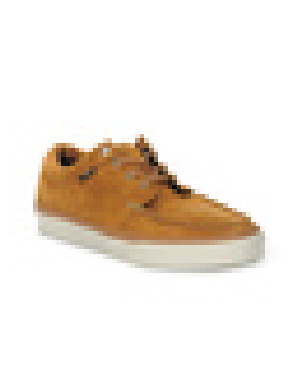

In [197]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [198]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

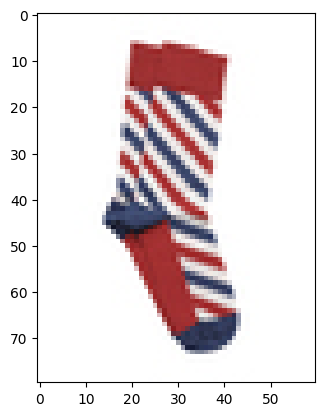

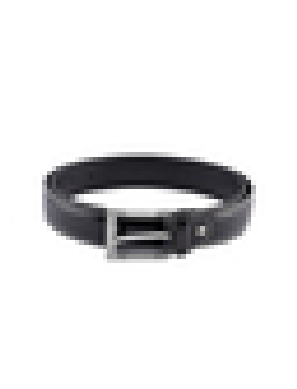

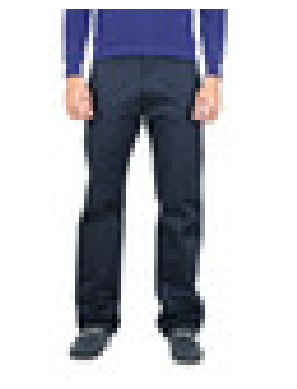

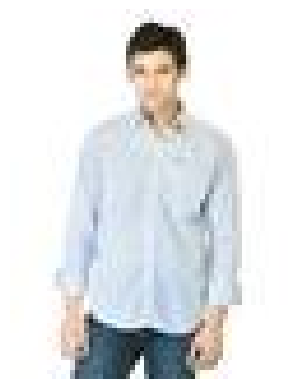

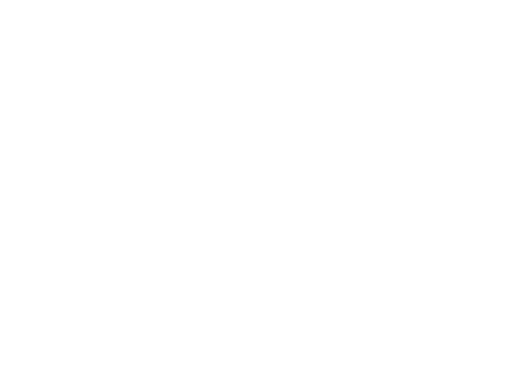

In [199]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [200]:
random_product_ids = [(95426, 54872),(29613, 33250),(41608, 8190), (63368, 14978), (69682, 8249), (11581, 48748), (34232, 44689), (89807, 3947), (63225, 40371), (46655, 3969)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Recommended items: [('Bottomwear', 9150), ('Shoes', 50164), ('Watches', 19298), ('Saree', None), ('Topwear', 26936), ('Eyewear', None)]
Main item:


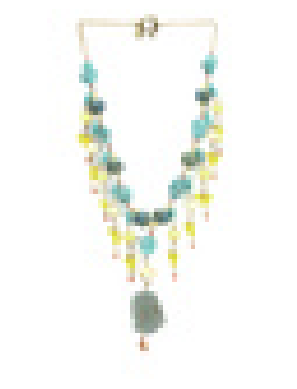

Recommended items:


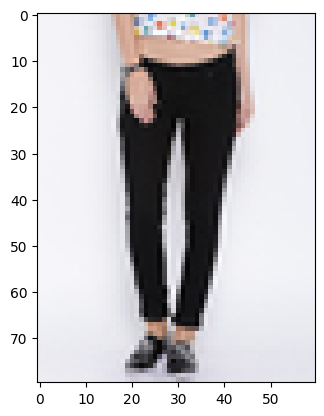

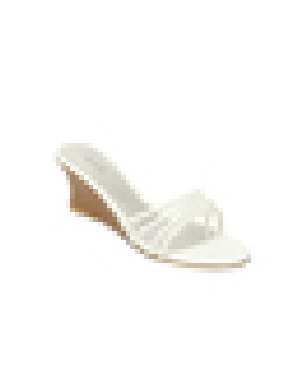

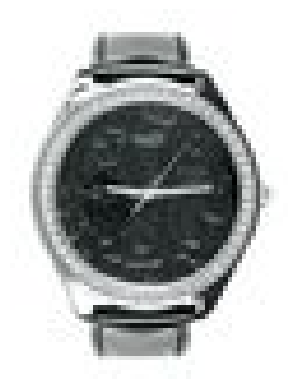

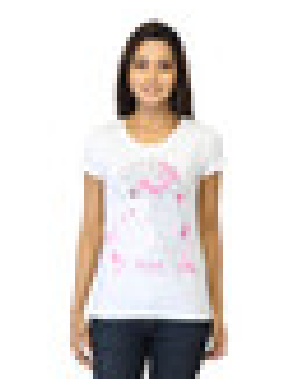

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Recommended items: [('Bottomwear', 44288), ('Jewellery', None), ('Belts', 51258), ('Shoes', 7227), ('Eyewear', None), ('Bags', None), ('Wallets', 14967), ('Watches', None)]
Main item:


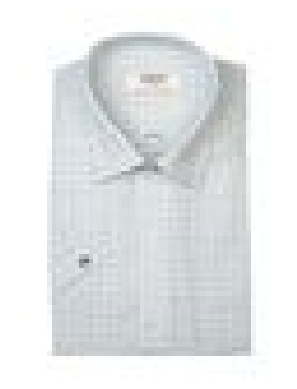

Recommended items:


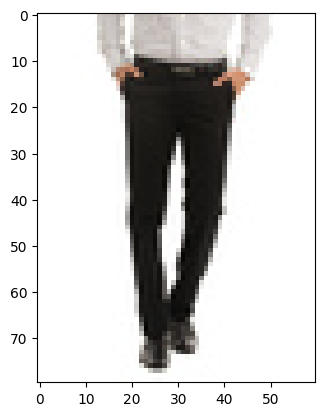

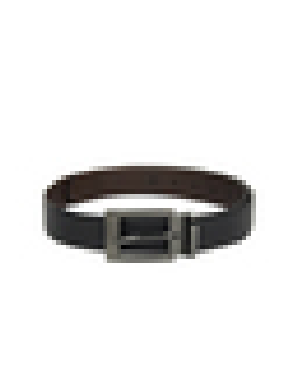

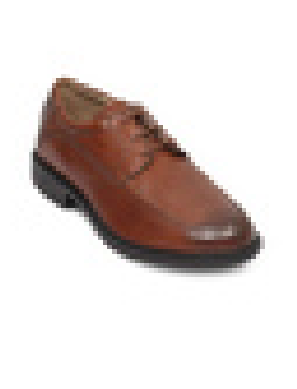

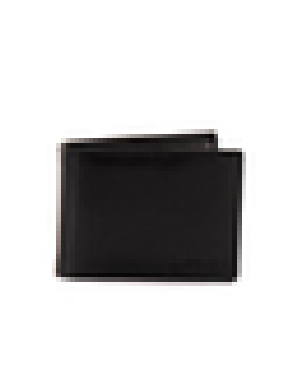

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Recommended items: [('Bottomwear', 26504), ('Belts', 27803), ('Jewellery', 48943), ('Eyewear', None), ('Shoes', 13365), ('Bags', 42936), ('Wallets', 52803), ('Watches', None)]
Main item:


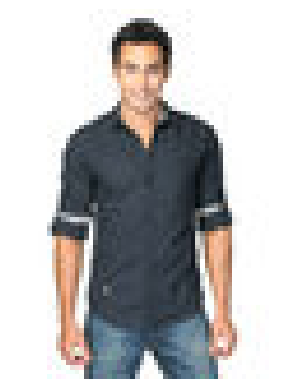

Recommended items:


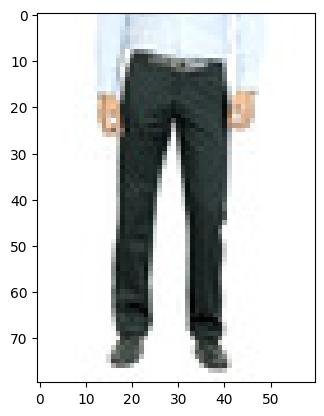

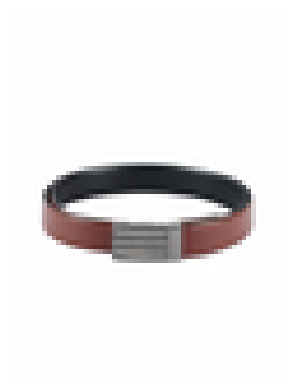

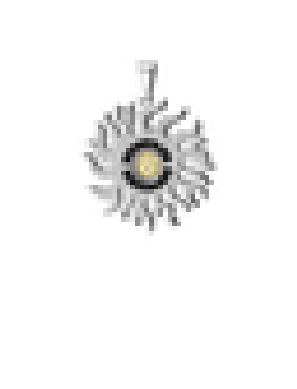

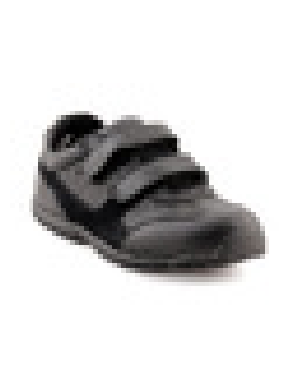

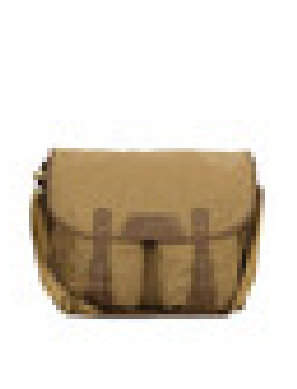

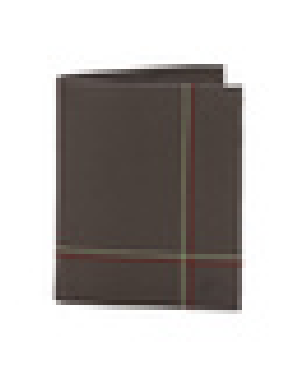

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Recommended items: [('Shoes', 55617), ('Bottomwear', 40109), ('Watches', None), ('Topwear', 26233)]
Main item:


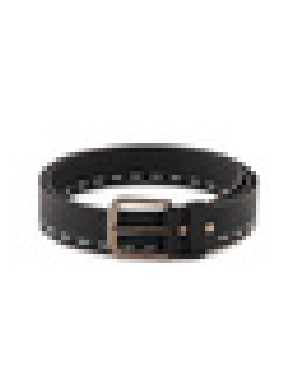

Recommended items:


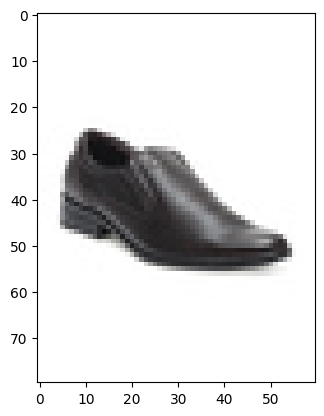

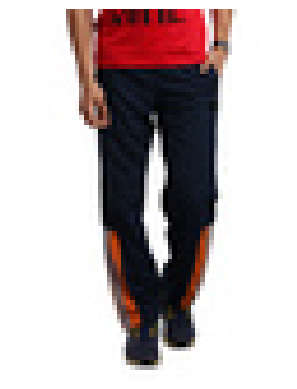

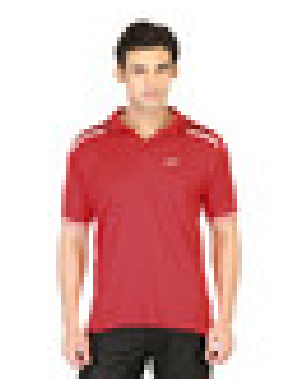

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Recommended items: [('Socks', 9359), ('Belts', 46307), ('Eyewear', None), ('Bottomwear', 13671), ('Topwear', 4329)]
Main item:


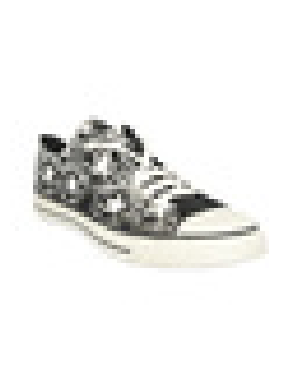

Recommended items:


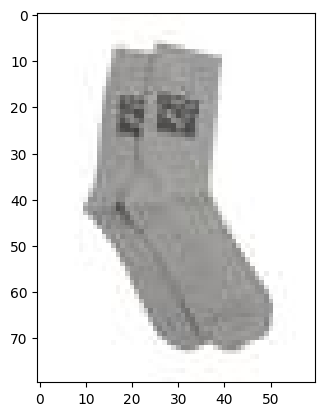

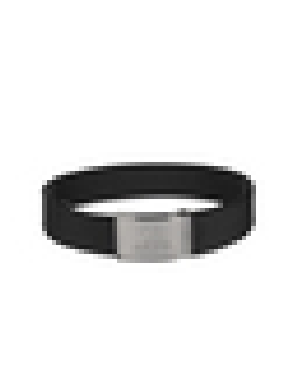

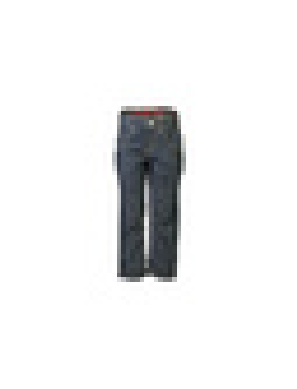

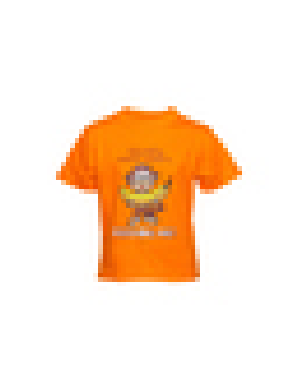

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Recommended items: [('Bottomwear', 28461), ('Shoes', 19052), ('Watches', 19298), ('Saree', None), ('Topwear', 6070), ('Eyewear', None)]
Main item:


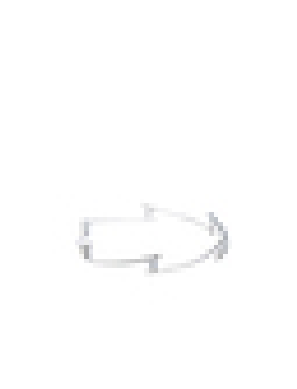

Recommended items:


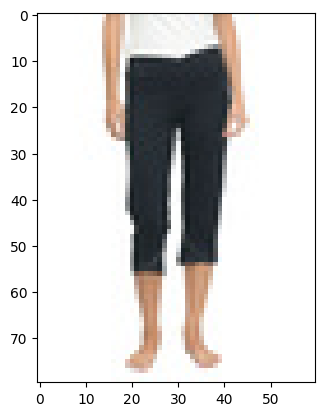

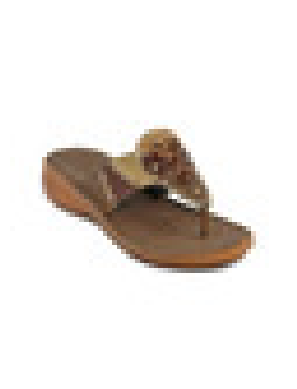

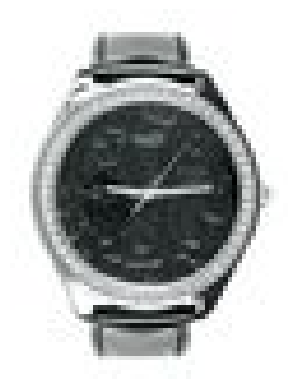

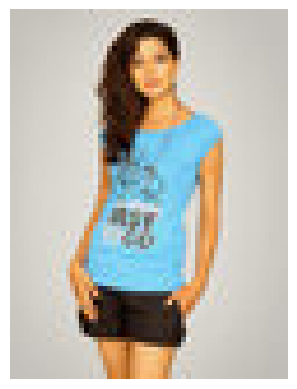

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Recommended items: [('Bottomwear', 33720), ('Jewellery', 48651), ('Belts', 37050), ('Shoes', 56936), ('Eyewear', None), ('Bags', 36520), ('Wallets', 45281), ('Watches', 19298)]
Main item:


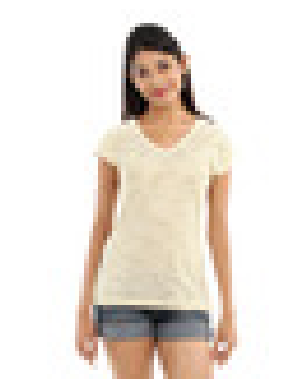

Recommended items:


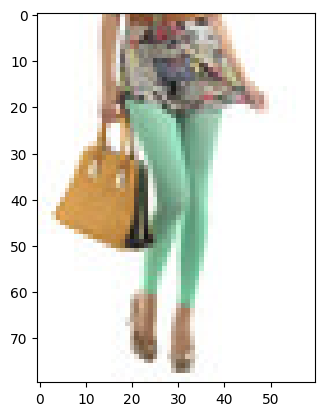

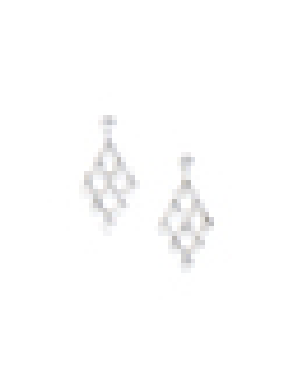

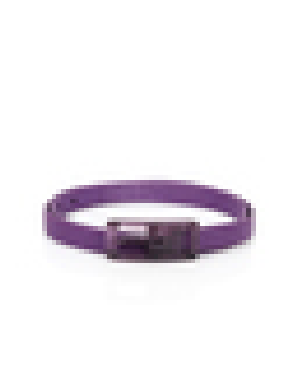

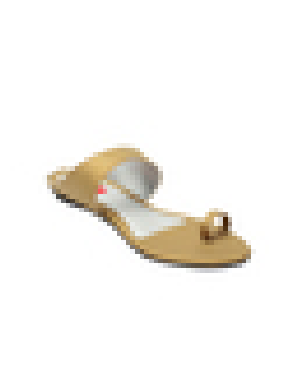

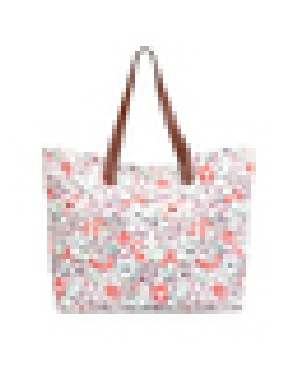

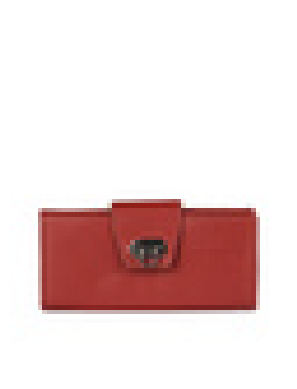

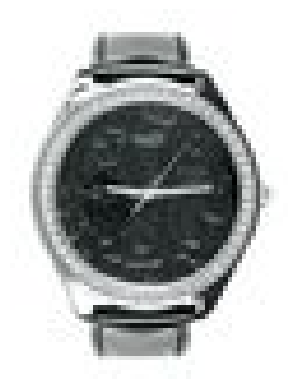

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Recommended items: [('Bottomwear', 20038), ('Jewellery', 48318), ('Belts', 37058), ('Shoes', 17737), ('Eyewear', None), ('Bags', 57236), ('Wallets', 38468), ('Watches', 19292)]
Main item:


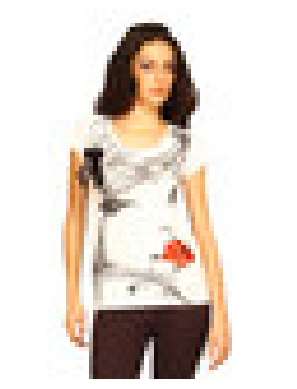

Recommended items:


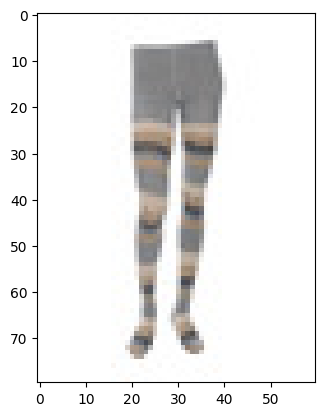

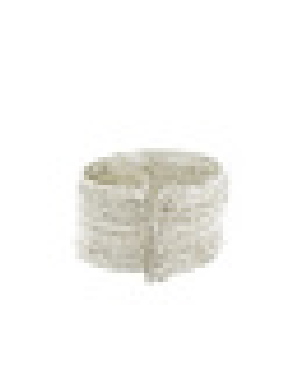

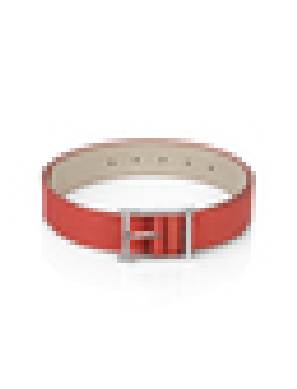

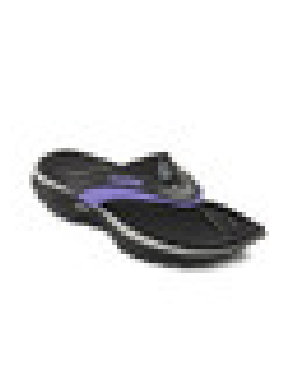

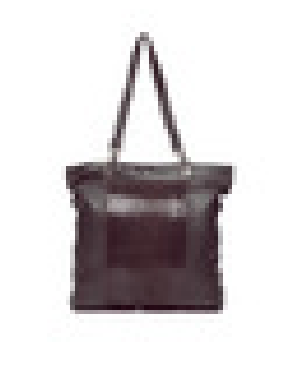

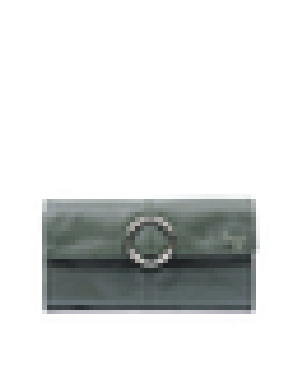

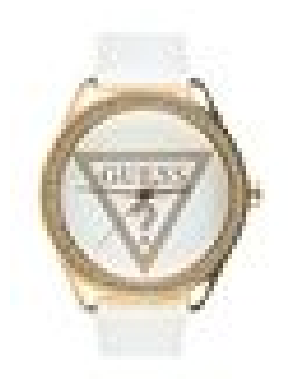

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Recommended items: [('Wallets', 42928), ('Shoes', 53867), ('Belts', 50218), ('Bags', 47321), ('Topwear', 7032), ('Watches', 19289)]
Main item:


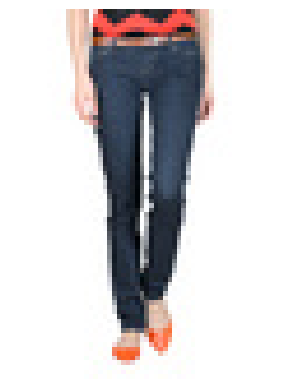

Recommended items:


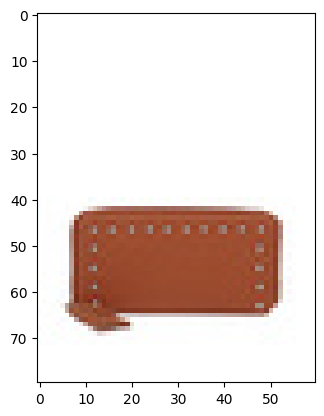

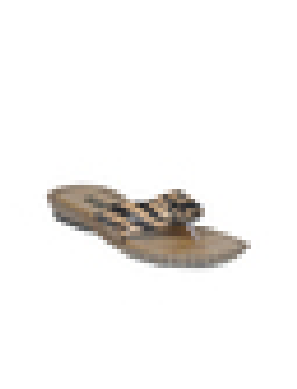

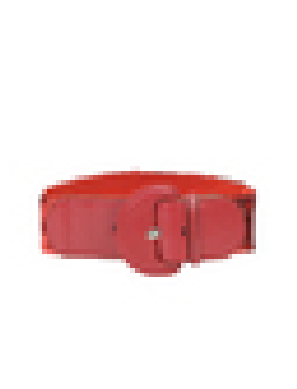

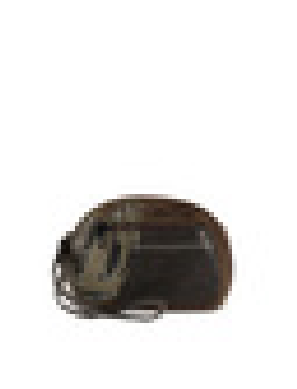

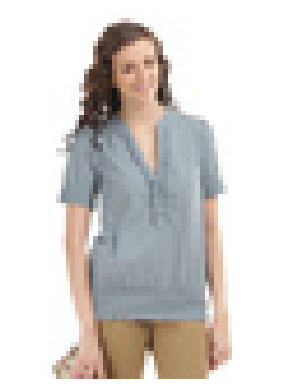

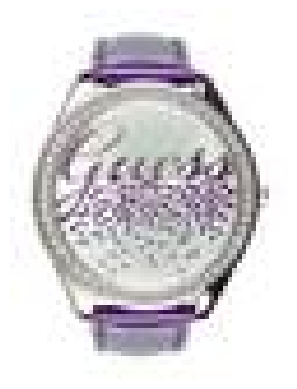

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Recommended items: [('Bottomwear', 40494), ('Jewellery', 35116), ('Belts', 42910), ('Shoes', 13704), ('Eyewear', None), ('Bags', 43273), ('Wallets', 54410), ('Watches', 19264)]
Main item:


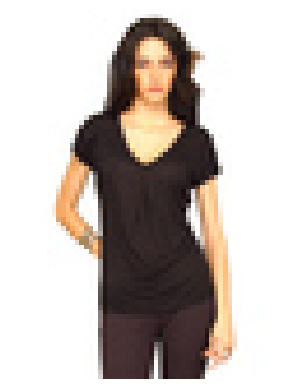

Recommended items:


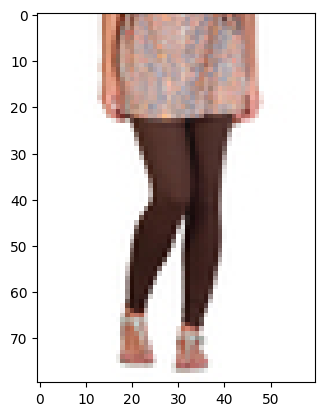

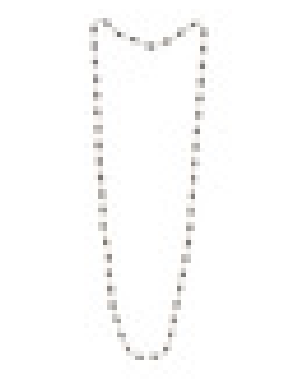

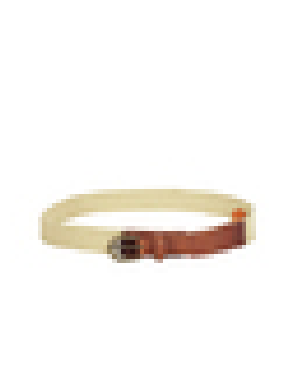

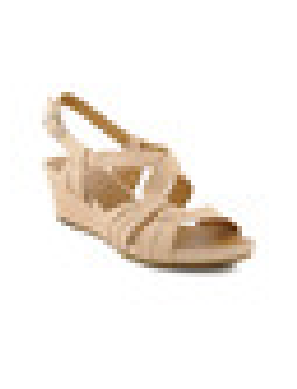

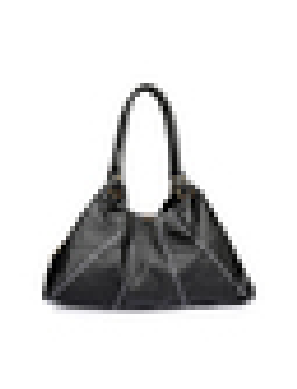

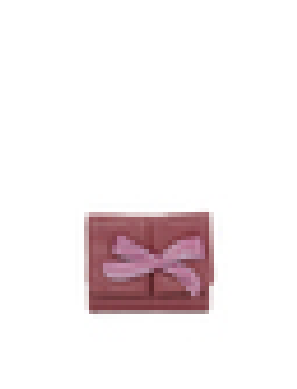

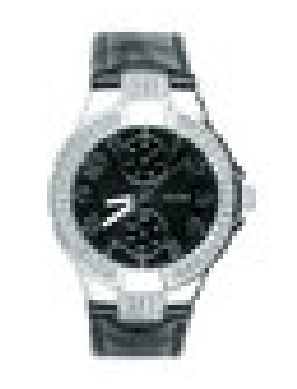

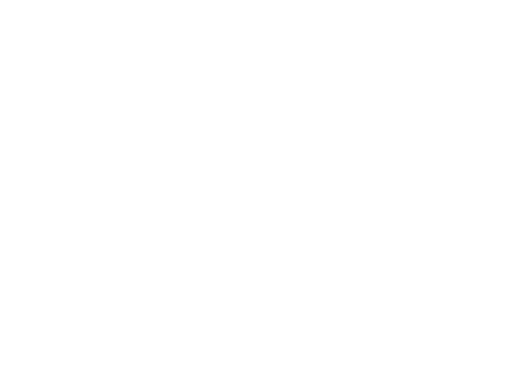

In [201]:
# Example usage:
for i in random_product_ids:
  item_id = i[1]
  recommendations = recommend_complementary_with_ids(item_id, df, model, label_encoders)
  print("Recommended items:", recommendations)
  path_images_1 = []
  image_url = "/content/drive/MyDrive/images/"
  for j in recommendations:
    if j[1] is not None:
      path_images_1.append(image_url + df[df.id==j[1]]['filename'].values[0])
  path_images_1
  image_path_1 = f"/content/drive/MyDrive/images/{item_id}.jpg"

  pil_image_1 = Image.open(image_path_1)
  resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

  print("Main item:")
  plt.imshow(resized_image_1)
  plt.axis("off")
  plt.show()

  print("Recommended items:")
  rec_images_1 = []
  for i in path_images_1:
      pil_image = Image.open(i)
      image_array = np.array(pil_image)
      resized_image = cv2.resize(image_array, IMAGE_SIZE)
      rec_images_1.append(resized_image)

  for i in rec_images_1:
      plt.imshow(i)
      plt.show()
      plt.axis("off")